<a href="https://colab.research.google.com/github/soowanchoi/swanscodex/blob/main/swanscodex_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gaussian Mixture Model
**Classification - Unsupervised - Instance Based - Parametric**
- Tuning # features & # Gaussians (with # components) using F1 Score and AUC

**Soowan Choi** 

***poor dataset, precision and recall tradeoff not accurate***.  
***step by step process is the same***

# **1) Problem**
**1.1) Classification (Clustering)** 
  - 2 wine types 
  - predict anomaly/red wine (NOTE: labels unknown for unsupervised learning) 

**1.2) Explore**
  - 6497 samples (rows), 13 features (columns), 2 targets (unknown)
  - unbalanced class: White Wine = 4898, Red Wine = 1599   
  - some missing values   



***Check Balance

Percentage of entries in dataset for each target class?  

- **White: 74.96%, Red: 24.52%**

Is the data balanced or imbalanced?   

- **This is an unbalanced dataset: significantly larger amount of data for target wine = white compared to target wine = red.** 

Why is an imbalanced dataset bad? Bad for KNN? 

- **An imbalanced dataset makes it difficult to accurately predict the positive class (red wine).** 
- **An imbalanced class distribution might affect a KNN classifier by classifying all new test data as the class with the most observations (white wine).**

What metric must be use when data is imbalanced?   

- **Use the F1 Score (Precision and Recall) as the performance metrics when class is imbalanced.** 
- **The ROC-AUC curves (True Positive and False Positive Rates from Confusion Matrix) are better when class is balanced** 


Reference: https://www.kaggle.com/datasets/rajyellow46/wine-quality?resource=download 

**1.1) Classification (Clustering)**

In [692]:
# load the dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/soowanchoi/swanscodex/main/winequality.csv'
df = pd.read_csv(url)

**1.2) Explore**

In [693]:
# how many samples and features?
print(f'there are {df.shape[0]} rows and {df.shape[1]} columns in this dataset \n')
df.rename(columns = {'type':'wine'}, inplace = True)
df.head()   

there are 6497 rows and 13 columns in this dataset 



,wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [694]:
# how many types of each class?
types = len(df.wine.unique())
print(f'there are {types} types of wine types to classify in this dataset: \n')

# print the names of each class and sample length
for i in range(types):
  print(f'{i+1} = {df.wine.unique()[i]}: \t sample data = {len(df[df.wine == df.wine.unique()[i]])}')  

there are 2 types of wine types to classify in this dataset: 

1 = white: 	 sample data = 4898
2 = red: 	 sample data = 1599


In [695]:
# check to see if data is balanced
white = round((len(df.where(df['wine']=='white').dropna()) / df.shape[0]) * 100, 2)
red = round((len(df.where(df['wine']=='red').dropna()) / df.shape[0]) * 100, 2)

print(f'percentage of entries for wine = white is {white}%')       #how many target wine = white 
print(f'percentage of entries for wine = red is {red}%')           #how many target wine = red

percentage of entries for wine = white is 74.96%
percentage of entries for wine = red is 24.52%


In [696]:
# data statistics
df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [697]:
# how many missing values in dataset?
df.info()  
print()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB



wine                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

# **2) Data**
**2.1) Clean**   
**2.2) Xy Split**   
**2.3) Test/Train Split**    
2.4) ~~Standardize~~ 

**2.1) Clean**

In [698]:
print(len(df))
df = df.dropna()
print(len(df))

6497
6463


**2.2) Xy Split**

In [699]:
# Xy split
feature_data = df.iloc[:, 1:]       # feature data X
target_data = df.iloc[:,0]          # target data y

In [700]:
# show the split dataframe of feature data X
feature_data.head(3)               

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


**2.3) Test/Train Split**

In [701]:
# test/train split: Training (65%), Validation (20%), Testing (15%)
from sklearn.model_selection import train_test_split

# split entire data set for 15% test set
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.15, random_state=1)

# split training set again for 20% validation set
# 0.85*0.23529 = 0.2% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.23529, random_state=1)        

In [702]:
# check to make sure the 65%, 20% and 15% split
print(f'training data: {round(len(X_train)/len(feature_data)*100,2)}%')       #train data
print(f'validation data: {round(len(X_val)/len(feature_data)*100,2)}%')       #validation data
print(f'testing data: {round(len(X_test)/len(feature_data)*100,2)}%')         #test data (new unseen data)

training data: 64.99%
validation data: 20.01%
testing data: 15.01%


**Visualize Distribution of White Wine and Red Wine**


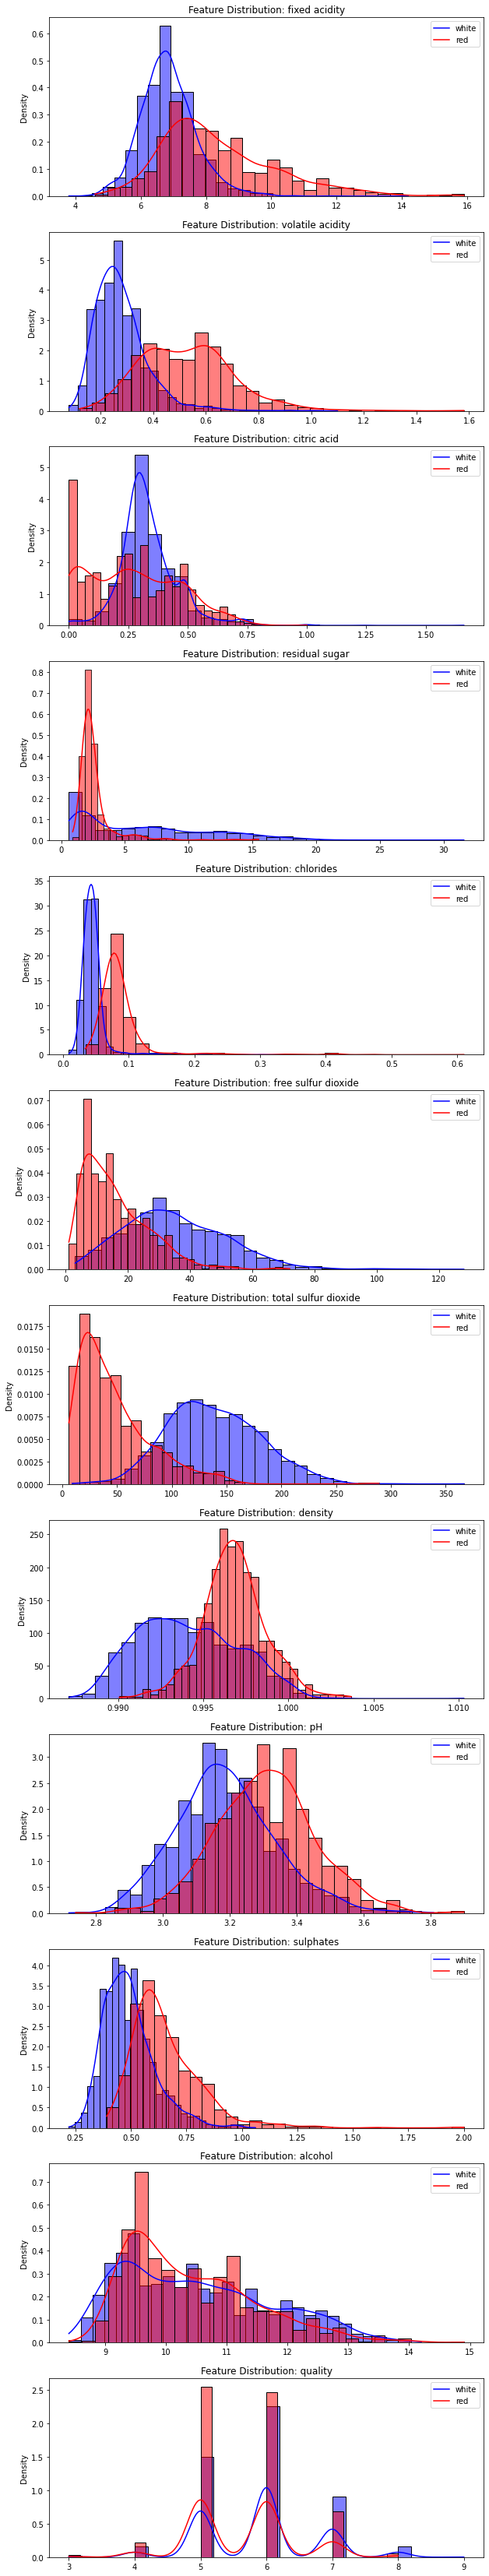

In [703]:
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

features = [f for f in df.columns[1:]]
num_plots = np.size(features)
plt.figure(figsize=(10,5*num_plots))

# grid layout to place each subplot
grid = gridspec.GridSpec(num_plots,1)       
for i, feature in enumerate(features):
    ax = plt.subplot(grid[i])  
    sns.histplot(X_train[feature][y_train=='white'], stat="density", kde=True, color="blue", bins=30)
    sns.histplot(X_train[feature][y_train=='red'], stat="density", kde=True, color="red", bins=30)
    ax.legend(['white', 'red'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Feature Distribution: ' + feature)

**These gaussian distributions tells us which features effectively differentiate between white and red wine. For example, feature "citric acid" will be a bad feature to detect anomalies as it has a nearly identical distribution between red wine (anomaly to be detected) and white wine. On the other hand, feature "chlorides" has two distinct distributions between the white wine and red wine, which would result in better precision and recall of true positives (detecting red wine as anomalies).**

# **3) Model: GMM Clustering**





### **3.1) Gaussian Model (ONE) - Feature (ONE)**

- Making a prediction using a **SINGLE FEATURE** at a time

**Fit Gaussian Regardless of Class:**      
**3.1.1)** Fit single gaussian distribution on full training data (both class). 
*   sklearn.mixture.GaussianMixture
*   n_components = 1


**3.1.2)** Compute AUC on full training data and validation data (both class).   
*   based on sklearn.mixture.GaussianMixture.score_samples.  

**3.1.3)** Repeat for each single feature.  

**3.1.4)** Select 3 best features to identify red wine.  
*   based on highest AUC of validation data

**3.1.5)** Optimal Threshold to Maximize F1 Score
*   for each best feature: find optimal threshold to maximize F1 score of validation data
*   sklearn.metrics.f1_score
*   anomlay (white wine): score_samples < threshold
*   **train and get probability of NOT outlier for each of the 3 best features:**
*   **score_samples = compute log likelihood of each sample been generated by any cluster (likelihood of not an outlier)**

**3.1.6)** Table: precision, recall and F1 Score on training data and validation data 
*   using optimal threshold  

**Fit Gaussian Based on Class:**      
**3.1.7)** Use the 3 best features with best AUC

**3.1.8)** Fit Gaussian only on RED WINE in the training data 

**3.1.9)** Compute AUC, F1 Score, Precision, Recall

**3.1.10)** Compare results when fitting gaussian regardless/based on class 


**CODE TO VISUALIZE ROC-AUC CURVES**
- training data and validation data of the One Gaussian Model - Single Feature

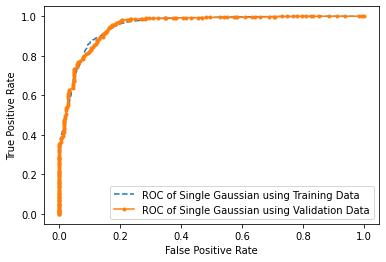

AUC of Single Gaussian using Training Data 0.951
AUC of Single Gaussian using Validation Data 0.953


In [704]:
from sklearn.mixture import GaussianMixture

# define parameters of gaussian mixture model - single feature
gm_one = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=1)     
# reshape(-1,1) = (however many rows, one feature) as an array

# train the gaussian mixture model  - unsupervised learning (uses no labels)
gm_one.fit(np.array(X_train.iloc[:,2]).reshape(-1,1))   

# compute AUC on full training set AND validation set (both class)
# log likelihood each sample belongs to cluster (likelihood not outlier)
p_train = gm_one.score_samples(np.array(X_train['total sulfur dioxide']).reshape(-1,1)) 
p_val = gm_one.score_samples(np.array(X_val['total sulfur dioxide']).reshape(-1,1))



from sklearn.metrics import roc_curve

# convert the target class labels to 0 and 1 
y_train = y_train.map({'red': 0, 'white': 1}).astype(int)
y_val = y_val.map({'red' : 0, 'white' : 1}).astype(int)

# plot the ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, -1* p_train)  
fpr_val, tpr_val, _ = roc_curve(y_val, -1* p_val)
plt.plot(fpr_train, tpr_train, linestyle = '--', label='ROC of Single Gaussian using Training Data')
plt.plot(fpr_val, tpr_val, marker='.', label='ROC of Single Gaussian using Validation Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

from sklearn.metrics import roc_auc_score

# calculate the AUC scores
print ("AUC of Single Gaussian using Training Data" , format(  roc_auc_score(y_train, -1* p_train)     , ".3f")  )
print ("AUC of Single Gaussian using Validation Data" , format(  roc_auc_score(y_val, -1* p_val)  , ".3f")  )


**3.1.1)** Fit single gaussian distribution on full training data (both class). 

**3.1.2)** Compute AUC on full training data and validation data (both class).    

**3.1.3)** Repeat for each single feature.  

In [705]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

# define parameters of gaussian mixture model - single gaussian
gm_one = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=1)      
# create empty dataframe for summary of AUC
table = pd.DataFrame()             
# empty list for training data AUC scores                               
AUC_train = []                             
# empty list for validation data AUC scores                      
AUC_val = []                                                

# 3.1.3) repeat for each single feature
for i in np.arange(0,len(feature_data.columns)):

  # 3.1.1) fit a single gaussian distribution on full training set (both class)
  # train the gaussian mixture model  - unsupervised learning (uses no labels)
  gm_one.fit(np.array(X_train.iloc[:,2]).reshape(-1,1))           

  # 3.1.2) compute AUC on full training set AND validation set (both class)
  # log likelihood each sample belongs to cluster (likelihood not outlier)
  p_train = gm_one.score_samples(np.array(X_train.iloc[:,i]).reshape(-1,1)) 
  p_val = gm_one.score_samples(np.array(X_val.iloc[:,i]).reshape(-1,1))

  #AUC of single gaussian using training data
  AUC_train.append(round(roc_auc_score(y_train, -1* p_train),3))    

  #AUC of single gaussian using validation data       
  AUC_val.append(round(roc_auc_score(y_val, -1* p_val),3))                

#3.1.3 ) table of AUC
table['feature'] = df.columns[1:]
table['AUC Train'] = AUC_train
table['AUC Val'] = AUC_val

In [706]:
# 3.1.3) table of AUC
table

,feature,AUC Train,AUC Val
0,fixed acidity,0.209,0.226
1,volatile acidity,0.244,0.261
2,citric acid,0.258,0.242
3,residual sugar,0.668,0.686
4,chlorides,0.949,0.935
5,free sulfur dioxide,0.847,0.839
6,total sulfur dioxide,0.951,0.953
7,density,0.226,0.220
8,pH,0.276,0.287
9,sulphates,0.170,0.170


**3.1.4)** Select 3 best features to identify red wine.  

In [707]:
# 3.1.4) best 3 features to distinguish red wine from white wine based on AUC of validation data
# sort table and find the three largest AUC_val scores
val1, val2, val3 = sorted(table['AUC Val'])[-3:]  
print(f'the three largest AUC scores from validation data are: {val1}, {val2}, {val3}')

# find the feature (index location) associated with the three largest AUC_val scores
x1 = table[table['AUC Val'] == val1]
x2 = table[table['AUC Val'] == val2]
x3 = table[table['AUC Val'] == val3]      
frames = [x1,x2,x3]
auc_sum = pd.concat(frames)
auc_sum

the three largest AUC scores from validation data are: 0.839, 0.935, 0.953


,feature,AUC Train,AUC Val
5,free sulfur dioxide,0.847,0.839
4,chlorides,0.949,0.935
6,total sulfur dioxide,0.951,0.953


**From the table of largest AUC scores for validation data above, the 3 best features to distinguish between red wine and white wine:**.  
- **free sulfur dioxide** 
- **chlorides**
- **total sulfur dioxide**

**3.1.5)** Optimal Threshold to Maximize F1 Score

In [708]:
# 3.1.5) optimal threshold (maximizes F1 score) of validation set for each of 3 best feature

# probability predictions of VALIDATION set:
#   train and get probability of NOT outlier for each of the 3 best features:
#   score_samples = compute log likelihood of each sample been generated by any cluster (likelihood of not an outlier)

# feature: free sulfur dioxide
# train model 
gm_one.fit(np.array(X_train['free sulfur dioxide']).reshape(-1,1))    
# log(probability) validation data using feature 1 (larger num classified valid -4>-10)
p_val_f1 = gm_one.score_samples(np.array(X_val['free sulfur dioxide']).reshape(-1,1))

# feature: chlorides
# train model 
gm_one.fit(np.array(X_train['chlorides']).reshape(-1,1))    
# log(probability) validation data using feature 2 (larger num classified valid -4>-10) 
p_val_f2 = gm_one.score_samples(np.array(X_val['chlorides']).reshape(-1,1))

# feature: total sulfur dioxide
# train model
gm_one.fit(np.array(X_train['total sulfur dioxide']).reshape(-1,1))    
# log(probability) validation data using feature 3 (larger num classified valid -4>-10)
p_val_f3 = gm_one.score_samples(np.array(X_val['total sulfur dioxide']).reshape(-1,1))

In [709]:
from sklearn.metrics import precision_score, recall_score, f1_score  

# feature - f1 (free sulfur dioxide) 
tr_f1 = []
f1_f1 = []
pre_f1 = []
rec_f1 = []
for i in np.arange(1, len(p_val_f1) - 500, 30):        # iterate through different thresholds                    
   tr = sorted(p_val_f1)[i]                            # sort the points by probability
   precision = precision_score(y_val, p_val_f1 < tr)   # precision = TP / TP + FP
   recall = recall_score(y_val, p_val_f1 < tr)         # recall = TP / TP + FN
   f1 = f1_score(y_val,p_val_f1 < tr)                  # F1 = 2 * (precision * recall) / (precision + recall)

   tr_f1.append(round(tr,3))                           # store the threshold values in a list
   f1_f1.append(round(f1,3))                           # store the F1 score values in a list
   pre_f1.append(round(precision,3))                   # store the precision values in a list
   rec_f1.append(round(recall,3))                      # store the recall values in a list
   print('For k: ',i,'\t  threshold: ','%.3f'% tr ,'  precision: ', '%.3f' % precision,'  recall: ', '%.3f' % recall, '  F1_Score: ','%.3f' % f1)

idx_f1 = f1_f1.index(max(f1_f1))                       # index of maximum F1 score value
f1_f1_val = max(f1_f1)                                 # max F1 Score of validation set
pre_f1_val = pre_f1[idx_f1]                            # corresponding precision score
rec_f1_val = rec_f1[idx_f1]                            # corresponding recall score
tr_f1_val = tr_f1[idx_f1]                              # optimal threshold
print(f'\n max F1 score: {f1_f1_val} with precision: {pre_f1_val}, recall: {rec_f1_val} at threshold: {tr_f1_val} for feature: free sulfur dioxide')            

For k:  1 	  threshold:  -22.928   precision:  1.000   recall:  0.001   F1_Score:  0.002
For k:  31 	  threshold:  -5.956   precision:  1.000   recall:  0.031   F1_Score:  0.060
For k:  61 	  threshold:  -5.220   precision:  1.000   recall:  0.063   F1_Score:  0.118
For k:  91 	  threshold:  -5.031   precision:  0.988   recall:  0.086   F1_Score:  0.159
For k:  121 	  threshold:  -4.923   precision:  0.841   recall:  0.098   F1_Score:  0.175
For k:  151 	  threshold:  -4.838   precision:  0.753   recall:  0.116   F1_Score:  0.201
For k:  181 	  threshold:  -4.774   precision:  0.773   recall:  0.130   F1_Score:  0.222
For k:  211 	  threshold:  -4.756   precision:  0.650   recall:  0.134   F1_Score:  0.222
For k:  241 	  threshold:  -4.618   precision:  0.661   recall:  0.160   F1_Score:  0.258
For k:  271 	  threshold:  -4.546   precision:  0.640   recall:  0.176   F1_Score:  0.276
For k:  301 	  threshold:  -4.476   precision:  0.639   recall:  0.194   F1_Score:  0.298
For k:  331 	 

In [710]:
# feature - f2 (chlorides) 
tr_f2 = []
f1_f2 = []
pre_f2 = []
rec_f2 = []
for i in np.arange(1, len(p_val_f2) - 500, 30):        # iterate through different thresholds                    
   tr = sorted(p_val_f2)[i]                            # sort the points by probability
   precision = precision_score(y_val, p_val_f2 < tr)   # precision = TP / TP + FP
   recall = recall_score(y_val, p_val_f2 < tr)         # recall = TP / TP + FN
   f1 = f1_score(y_val,p_val_f2 < tr)                  # F1 = 2 * (precision * recall) / (precision + recall)

   tr_f2.append(round(tr,3))                           # store the threshold values in a list
   f1_f2.append(round(f1,3))                           # store the F1 score values in a list
   pre_f2.append(round(precision,3))                   # store the precision values in a list
   rec_f2.append(round(recall,3))                      # store the recall values in a list
   print('For k: ',i,'\t  threshold: ','%.3f'% tr ,'  precision: ', '%.3f' % precision,'  recall: ', '%.3f' % recall, '  F1_Score: ','%.3f' % f1) 

idx_f2 = f1_f2.index(max(f1_f2))                       # index of maximum F1 score value
f1_f2_val = max(f1_f2)                                 # max F1 Score of validation set
pre_f2_val = pre_f2[idx_f2]                            # corresponding precision score
rec_f2_val = rec_f2[idx_f2]                            # corresponding recall score
tr_f2_val = tr_f2[idx_f2]                              # optimal threshold
print(f'\n max F1 score: {f1_f2_val} with precision: {pre_f2_val}, recall: {rec_f2_val} at threshold: {tr_f2_val} for feature: chlorides')  

For k:  1 	  threshold:  -52.525   precision:  0.000   recall:  0.000   F1_Score:  0.000
For k:  31 	  threshold:  0.062   precision:  0.323   recall:  0.010   F1_Score:  0.020
For k:  61 	  threshold:  1.365   precision:  0.300   recall:  0.019   F1_Score:  0.035
For k:  91 	  threshold:  1.809   precision:  0.278   recall:  0.026   F1_Score:  0.047
For k:  121 	  threshold:  1.907   precision:  0.308   recall:  0.038   F1_Score:  0.068
For k:  151 	  threshold:  2.014   precision:  0.361   recall:  0.055   F1_Score:  0.095
For k:  181 	  threshold:  2.065   precision:  0.394   recall:  0.071   F1_Score:  0.120
For k:  211 	  threshold:  2.093   precision:  0.423   recall:  0.091   F1_Score:  0.149
For k:  241 	  threshold:  2.116   precision:  0.451   recall:  0.108   F1_Score:  0.174
For k:  271 	  threshold:  2.157   precision:  0.491   recall:  0.136   F1_Score:  0.213
For k:  301 	  threshold:  2.178   precision:  0.522   recall:  0.160   F1_Score:  0.245
For k:  331 	  threshold

In [711]:
# feature - f3 (total sulfur dioxide)  
tr_f3 = []
f1_f3 = []
pre_f3 = []
rec_f3 = []
for i in np.arange(1, len(p_val_f3) - 500, 30):        # iterate through different thresholds                    
   tr = sorted(p_val_f3)[i]                            # sort the points by probability
   precision = precision_score(y_val, p_val_f3 < tr)   # precision = TP / TP + FP
   recall = recall_score(y_val, p_val_f3 < tr)         # recall = TP / TP + FN
   f1 = f1_score(y_val,p_val_f3 < tr)                  # F1 = 2 * (precision * recall) / (precision + recall)

   tr_f3.append(round(tr,3))                           # store the threshold values in a list
   f1_f3.append(round(f1,3))                           # store the F1 score values in a list
   pre_f3.append(round(precision,3))                   # store the precision values in a list
   rec_f3.append(round(recall,3))                      # store the recall values in a list
   print('For k: ',i,'\t  threshold: ','%.3f'% tr ,'  precision: ', '%.3f' % precision,'  recall: ', '%.3f' % recall, '  F1_Score: ','%.3f' % f1) 

idx_f3 = f1_f3.index(max(f1_f3))                       # index of maximum F1 score value
f1_f3_val = max(f1_f3)                                 # max F1 Score of validation set
pre_f3_val = pre_f3[idx_f3]                            # corresponding precision score
rec_f3_val = rec_f3[idx_f3]                            # corresponding recall score
tr_f3_val = tr_f3[idx_f3]                              # optimal threshold
print(f'\n max F1 score: {f1_f3_val} with precision: {pre_f3_val}, recall: {rec_f3_val} at threshold: {tr_f3_val} for feature: total sulfur dioxide')  

For k:  1 	  threshold:  -8.804   precision:  1.000   recall:  0.001   F1_Score:  0.002
For k:  31 	  threshold:  -6.793   precision:  0.839   recall:  0.027   F1_Score:  0.052
For k:  61 	  threshold:  -6.673   precision:  0.630   recall:  0.035   F1_Score:  0.066
For k:  91 	  threshold:  -6.529   precision:  0.411   recall:  0.038   F1_Score:  0.070
For k:  121 	  threshold:  -6.387   precision:  0.421   recall:  0.052   F1_Score:  0.093
For k:  151 	  threshold:  -6.285   precision:  0.430   recall:  0.067   F1_Score:  0.116
For k:  181 	  threshold:  -6.183   precision:  0.429   recall:  0.077   F1_Score:  0.131
For k:  211 	  threshold:  -6.088   precision:  0.408   recall:  0.088   F1_Score:  0.145
For k:  241 	  threshold:  -5.995   precision:  0.429   recall:  0.106   F1_Score:  0.170
For k:  271 	  threshold:  -5.918   precision:  0.439   recall:  0.122   F1_Score:  0.191
For k:  301 	  threshold:  -5.859   precision:  0.430   recall:  0.133   F1_Score:  0.203
For k:  331 	  

**3.1.6)** Table: precision, recall and F1 Score on training data and validation data 
*   using optimal threshold  




In [712]:
# 3.1.6) summary of performance metrics on training set of f1, f2, f3 features using the optimal threshold on TRAINING DATA

# feature: free sulfur dioxide
# train model 
gm_one.fit(np.array(X_train['free sulfur dioxide']).reshape(-1,1))    
# log(probability) validation data using feature 1 (larger num classified valid -4>-10)
p_train_f1 = gm_one.score_samples(np.array(X_train['free sulfur dioxide']).reshape(-1,1))

# feature: chlorides
# train model 
gm_one.fit(np.array(X_train['chlorides']).reshape(-1,1))    
# log(probability) validation data using feature 2 (larger num classified valid -4>-10) 
p_train_f2 = gm_one.score_samples(np.array(X_train['chlorides']).reshape(-1,1))

# feature: total sulfur dioxide
# train model
gm_one.fit(np.array(X_train['total sulfur dioxide']).reshape(-1,1))    
# log(probability) validation data using feature 3 (larger num classified valid -4>-10)
p_train_f3 = gm_one.score_samples(np.array(X_train['total sulfur dioxide']).reshape(-1,1))

In [713]:
# feature - f1 (free sulfur dioxide)              
tr_f1_val = tr_f1[idx_f1]                                       # optimal threshold found previously from validation set
pre_f1_train = precision_score(y_train, p_train_f1 < tr_f1_val) # precision = TP / TP + FP
rec_f1_train = recall_score(y_train, p_train_f1 < tr_f1_val)    # recall = TP / TP + FN
f1_f1_train = f1_score(y_train, p_train_f1 < tr_f1_val)         # F1 = 2 * (precision * recall) / (precision + recall)
print(
    f'''F1 score: {round(f1_f1_train,3)} with precision: {round(pre_f1_train,3)},
    recall: {round(rec_f1_train,3)} at threshold: {round(tr_f1_val,3)} for feature "free sulfur dioxide" on training set
    ''')  

F1 score: 0.608 with precision: 0.695,
    recall: 0.541 at threshold: -3.938 for feature "free sulfur dioxide" on training set
    


In [714]:
# feature - f2 (chlorides)              
tr_f2_val = tr_f2[idx_f2]                                       # optimal threshold found previously from validation set
pre_f2_train = precision_score(y_train, p_train_f2 < tr_f2_val) # precision = TP / TP + FP
rec_f2_train = recall_score(y_train, p_train_f2 < tr_f2_val)    # recall = TP / TP + FN
f1_f2_train = f1_score(y_train, p_train_f2 < tr_f2_val)         # F1 = 2 * (precision * recall) / (precision + recall)
print(
    f'''F1 score: {round(f1_f2_train,3)} with precision: {round(pre_f2_train,3)}, 
    recall: {round(rec_f2_train,3)} at threshold: {round(tr_f2_val,3)} for feature "chlorides" on training set
    ''')  

F1 score: 0.595 with precision: 0.677, 
    recall: 0.531 at threshold: 2.366 for feature "chlorides" on training set
    


In [715]:
# feature - f3 (total sulfur dioxide)             
tr_f3_val = tr_f3[idx_f3]                                       # optimal threshold found previously from validation set
pre_f3_train= precision_score(y_train, p_train_f3 < tr_f3_val)  # precision = TP / TP + FP
rec_f3_train= recall_score(y_train, p_train_f3 < tr_f3_val)     # recall = TP / TP + FN
f1_f3_train= f1_score(y_train, p_train_f3 < tr_f3_val)          # F1 = 2 * (precision * recall) / (precision + recall)
print(
    f'''F1 score: {round(f1_f3_train,3)} with precision: {round(pre_f3_train,3)}, 
    recall: {round(rec_f3_train,3)} at threshold: {round(tr_f3_val,3)} for feature "total sulfur dioxide" on training set
    ''')  

F1 score: 0.584 with precision: 0.651, 
    recall: 0.529 at threshold: -5.072 for feature "total sulfur dioxide" on training set
    


In [716]:
# summary of performance metrics 

# create empty dataframe for summary of performance metrics
table_p6 = pd.DataFrame()                         

# features from both datasets
feat = ['f1_val','f2_val','f3_val','f1_train','f2_train','f3_train']  
# optimal threshold 
tr_val = [tr_f1_val, tr_f2_val, tr_f3_val, tr_f1_val, tr_f2_val, tr_f3_val]     
# precision scores
pre_val = [pre_f1_val, pre_f2_val, pre_f3_val, pre_f1_train, pre_f2_train, pre_f3_train] 
# recall scores 
rec_val = [rec_f1_val, rec_f2_val, rec_f3_val, rec_f1_train, rec_f2_train, rec_f3_train] 
# f1 scores
f1_val = [f1_f1_val, f1_f2_val, f1_f3_val, f1_f1_train, f1_f2_train, f1_f3_train]       

AUC = [auc_sum.iloc[0,2],auc_sum.iloc[2,2],auc_sum.iloc[1,2],auc_sum.iloc[0,1],auc_sum.iloc[2,1],auc_sum.iloc[1,1]]  #AUC values

# round the values to 3 decimal places:
pre_val_ = []
rec_val_ = []
f1_val_ = []
for i in np.arange(0,len(pre_val)):
  pre_val_.append(round(pre_val[i],3))      #round precision values
  rec_val_.append(round(rec_val[i],3))      #round recall values
  f1_val_.append(round(f1_val[i],3))        #round f1 score values

# fill dataframe table
table_p6['Features'] = feat
table_p6['Opt. Threshold'] = tr_val
table_p6['Precision'] = pre_val_
table_p6['Recall'] = rec_val_
table_p6['F1 Score'] = f1_val_
table_p6['AUC'] = AUC

# print dataframe for performance metrics results
table_p6

,Features,Opt. Threshold,Precision,Recall,F1 Score,AUC
0,f1_val,-3.938,0.680,0.546,0.606,0.839
1,f2_val,2.366,0.682,0.548,0.608,0.953
2,f3_val,-5.072,0.643,0.516,0.573,0.935
3,f1_train,-3.938,0.695,0.541,0.608,0.847
4,f2_train,2.366,0.677,0.531,0.595,0.951
5,f3_train,-5.072,0.651,0.529,0.584,0.949


**3.1.7)** Use the 3 best features with best AUC

**3.1.8)** Fit Gaussian only on WHITE WINE in the training data 

In [717]:
# fitting based on class:

# 3.1.7) the 3 features that had the best AUC was "free sulfur dioxide", "chlorides", "total sulfur dioxide"
# 3.1.8) repeat but only fit gaussian on RED WINE DATA IN THE TRAINING SET

X_train_2b = X_train.copy()                                        # copy the training set
X_train_2b['wine'] = y_train                                       # add column for wine labels
X_train_2b = X_train_2b.where(X_train_2b['wine'] == 0).dropna()    # only keep red wine data

# define parameters of gaussian mixture model - single feature
gm_one_nf = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=1)  

**3.1.9)** Compute AUC, F1 Score, Precision, Recall


**Best Feature 1: Free Sulfur Dioxide**

In [718]:
# feature - f1 (free sulfur dioxide)
# train model using f1 feature - RED WINE DATA ONLY
gm_one_nf.fit(np.array(X_train_2b['free sulfur dioxide']).reshape(-1,1))     

# compute AUC on full training set AND validation set (RED WINE class)
# log likelihood each sample belongs to cluster (likelihood not outlier)
p_train_nf = gm_one_nf.score_samples(np.array(X_train['free sulfur dioxide']).reshape(-1,1))
p_val_nf = gm_one_nf.score_samples(np.array(X_val['free sulfur dioxide']).reshape(-1,1))
AUC_train_f1 = round(roc_auc_score(y_train, -1 * p_train_nf),3)
AUC_val_f1 = round(roc_auc_score(y_val, -1 * p_val_nf),3)

print(f'AUC of feature f1 from training set: {AUC_train_f1}')
print(f'AUC of feature f1 from validation set: {AUC_val_f1}')

# optimal threshold (maximizes F1 score) of Validation set for feature f1
tr_f1 = []
f1_f1 = []
pre_f1 = []
rec_f1 = []
for i in np.arange(1, len(p_val_nf) - 500, 30):        # iterate through different thresholds                    
   tr = sorted(p_val_nf)[i]                            # sort the points by probability
   precision = precision_score(y_val, p_val_nf < tr)   # precision = TP / TP + FP
   recall = recall_score(y_val, p_val_nf < tr)         # recall = TP / TP + FN
   f1 = f1_score(y_val,p_val_nf < tr)                  # F1 = 2 * (precision * recall) / (precision + recall)

   tr_f1.append(round(tr,3))                           # store the threshold values in a list
   f1_f1.append(round(f1,3))                           # store the F1 score values in a list
   pre_f1.append(round(precision,3))                   # store the precision values in a list
   rec_f1.append(round(recall,3))                      # store the recall values in a list

idx_f1 = f1_f1.index(max(f1_f1))                       # index of maximum F1 score value
f1_f1_val = max(f1_f1)                                 # max F1 Score of validation set
pre_f1_val = pre_f1[idx_f1]                            # corresponding precision score
rec_f1_val = rec_f1[idx_f1]                            # corresponding recall score
tr_f1_val = tr_f1[idx_f1]                              # optimal threshold
print(
    f'''\n feature f1 Validation Data: \n max F1 score: \t {f1_f1_val} \n precision: \t {pre_f1_val}
 recall: \t {rec_f1_val} \n threshold: \t {tr_f1_val}\n
    ''')

#summary of performance metrics on training set of f1 feature using the optimal threshold
tr_f1_val = tr_f1[idx_f1]                                       # optimal threshold found previously from validation set
pre_f1_train = precision_score(y_train, p_train_nf < tr_f1_val) # precision = TP / TP + FP
rec_f1_train = recall_score(y_train, p_train_nf < tr_f1_val)    # recall = TP / TP + FN
f1_f1_train = f1_score(y_train, p_train_nf < tr_f1_val)         # F1 = 2 * (precision * recall) / (precision + recall)
print(
    f''' feature f1 Training Data: \n F1 score: \t {round(f1_f1_train,3)} \n precision: \t {round(pre_f1_train,3)}
 recall: \t {round(rec_f1_train,3)} \n threshold: \t {round(tr_f1_val,3)} 
''')  

AUC of feature f1 from training set: 0.765
AUC of feature f1 from validation set: 0.758

 feature f1 Validation Data: 
 max F1 score: 	 0.778 
 precision: 	 0.878
 recall: 	 0.698 
 threshold: 	 -3.722

    
 feature f1 Training Data: 
 F1 score: 	 0.78 
 precision: 	 0.853
 recall: 	 0.718 
 threshold: 	 -3.722 



**Best Feature 2: Chloride**

In [719]:
# feature - f2 (chlorides) 
# train model using f2 feature - RED WINE DATA ONLY
gm_one_nf.fit(np.array(X_train_2b['chlorides']).reshape(-1,1))      

# compute AUC on full training set AND validation set (RED WINE class)
# log likelihood each sample belongs to cluster (likelihood not outlier)
p_train_nf = gm_one_nf.score_samples(np.array(X_train['chlorides']).reshape(-1,1)) 
p_val_nf = gm_one_nf.score_samples(np.array(X_val['chlorides']).reshape(-1,1))
AUC_train_f2 = round(roc_auc_score(y_train, -1 * p_train_nf),3)
AUC_val_f2 = round(roc_auc_score(y_val, -1 * p_val_nf),3)

print(f'AUC of feature f2 from training set: {AUC_train_f2}')
print(f'AUC of feature f2 from validation set: {AUC_val_f2}')

# optimal threshold (maximizes F1 score) of Validation set for each of 3 best feature
tr_f2 = []
f1_f2 = []
pre_f2 = []
rec_f2 = []
for i in np.arange(1, len(p_val_nf) - 500, 30):        # iterate through different thresholds                    
   tr = sorted(p_val_nf)[i]                            # sort the points by probability
   precision = precision_score(y_val, p_val_nf < tr)   # precision = TP / TP + FP
   recall = recall_score(y_val, p_val_nf < tr)         # recall = TP / TP + FN
   f1 = f1_score(y_val,p_val_nf < tr)                  # F1 = 2 * (precision * recall) / (precision + recall)

   tr_f2.append(round(tr,3))                           # store the threshold values in a list
   f1_f2.append(round(f1,3))                           # store the F1 score values in a list
   pre_f2.append(round(precision,3))                   # store the precision values in a list
   rec_f2.append(round(recall,3))                      # store the recall values in a list

idx_f2 = f1_f2.index(max(f1_f2))                       # index of maximum F1 score value
f1_f2_val = max(f1_f2)                                 # max F1 Score of validation set
pre_f2_val = pre_f2[idx_f2]                            # corresponding precision score
rec_f2_val = rec_f2[idx_f2]                            # corresponding recall score
tr_f2_val = tr_f2[idx_f2]                              # optimal threshold
print(
    f'''\n feature f2 Validation Data: \n max F1 score: \t {f1_f2_val} \n precision: \t {pre_f2_val}
 recall: \t {rec_f2_val} \n threshold: \t {tr_f2_val}\n
    ''')

#f2 feature               
tr_f2_val = tr_f2[idx_f2]                                       # optimal threshold found previously from validation set
pre_f2_train = precision_score(y_train, p_train_nf < tr_f2_val) # precision = TP / TP + FP
rec_f2_train = recall_score(y_train, p_train_nf < tr_f2_val)    # recall = TP / TP + FN
f1_f2_train = f1_score(y_train, p_train_nf < tr_f2_val)         # F1 = 2 * (precision * recall) / (precision + recall)
print(
    f''' feature f2 Training Data: \n F1 score: \t {round(f1_f2_train,3)} \n precision: \t {round(pre_f2_train,3)}
 recall: \t {round(rec_f2_train,3)} \n threshold: \t {round(tr_f2_val,3)} 
''')  

AUC of feature f2 from training set: 0.922
AUC of feature f2 from validation set: 0.882

 feature f2 Validation Data: 
 max F1 score: 	 0.835 
 precision: 	 0.95
 recall: 	 0.745 
 threshold: 	 1.818

    
 feature f2 Training Data: 
 F1 score: 	 0.843 
 precision: 	 0.969
 recall: 	 0.746 
 threshold: 	 1.818 



**Best Feature 3: Total Sulfur Dioxide**

In [720]:
#f3 feature:
gm_one_nf.fit(np.array(X_train_2b['total sulfur dioxide']).reshape(-1,1))      #train model using f3 feature - NON-FRAUDULENT CLASS ONLY

#compute AUC on full training set AND validation set (NON-FRAUDULENT class)
p_train_nf = gm_one_nf.score_samples(np.array(X_train['total sulfur dioxide']).reshape(-1,1)) #log likelihood each sample belongs to cluster (likelihood not outlier)
p_val_nf = gm_one_nf.score_samples(np.array(X_val['total sulfur dioxide']).reshape(-1,1))
AUC_train_f3 = round(roc_auc_score(y_train, -1 * p_train_nf),3)
AUC_val_f3 = round(roc_auc_score(y_val, -1 * p_val_nf),3)

print(f'AUC of feature f3 from training set: {AUC_train_f3}')
print(f'AUC of feature f3 from validation set: {AUC_val_f3}')

#optimal threshold (maximizes F1 score) of Validation set for each of 3 best feature
tr_f3 = []
f1_f3 = []
pre_f3 = []
rec_f3 = []
for i in np.arange(1, len(p_val_f3) - 500, 30):      #iterate through different thresholds                    
   tr = sorted(p_val_f3)[i]                            #sort the points by probability
   precision = precision_score(y_val, p_val_nf < tr)   #precision = TP / TP + FP
   recall = recall_score(y_val, p_val_nf < tr)         #recall = TP / TP + FN
   f1 = f1_score(y_val,p_val_nf < tr)                  #F1 = 2 * (precision * recall) / (precision + recall)
   
   tr_f3.append(round(tr,3))                           #store the threshold values in a list
   f1_f3.append(round(f1,3))                           #store the F1 score values in a list
   pre_f3.append(round(precision,3))                   #store the precision values in a list
   rec_f3.append(round(recall,3))                      #store the recall values in a list

idx_f3 = f1_f3.index(max(f1_f3))                     #index of maximum F1 score value
f1_f3_val = max(f1_f3)                                #max F1 Score of validation set
pre_f3_val = pre_f3[idx_f3]                          #corresponding precision score
rec_f3_val = rec_f3[idx_f3]                          #corresponding recall score
tr_f3_val = tr_f3[idx_f3]                            #optimal threshold
print(
    f'''\n feature f3 Validation Data: \n max F1 score: \t {f1_f3_val} \n precision: \t {pre_f3_val}
 recall: \t {rec_f3_val} \n threshold: \t {tr_f3_val}\n
    ''') 

#f3 feature               
tr_f3_val = tr_f3[idx_f3]                                       #optimal threshold found previously from validation set
pre_f3_train = precision_score(y_train, p_train_nf < tr_f3_val) #precision = TP / TP + FP
rec_f3_train = recall_score(y_train, p_train_nf < tr_f3_val)    #recall = TP / TP + FN
f1_f3_train = f1_score(y_train, p_train_nf < tr_f3_val)         #F1 = 2 * (precision * recall) / (precision + recall)
print(
    f''' feature f3 Training Data: \n F1 score: \t {round(f1_f3_train,3)} \n precision: \t {round(pre_f3_train,3)}
 recall: \t {round(rec_f3_train,3)} \n threshold: \t {round(tr_f3_val,3)} 
''')  

AUC of feature f3 from training set: 0.93
AUC of feature f3 from validation set: 0.936

 feature f3 Validation Data: 
 max F1 score: 	 0.929 
 precision: 	 0.948
 recall: 	 0.909 
 threshold: 	 -5.117

    
 feature f3 Training Data: 
 F1 score: 	 0.927 
 precision: 	 0.953
 recall: 	 0.902 
 threshold: 	 -5.117 



**3.1.10)** Compare results when fitting gaussian regardless/based on class

In [721]:
# create NEW empty dataframe for summary of performance metrics
table_b = pd.DataFrame()                      

# features from both datasets
feat = ['f1_val','f2_val','f3_val','f1_train','f2_train','f3_train']  
# optimal threshold 
tr_val = [tr_f1_val, tr_f2_val, tr_f3_val, tr_f1_val, tr_f2_val, tr_f3_val]       
# precision scores
pre_val = [pre_f1_val, pre_f2_val, pre_f3_val, pre_f1_train, pre_f2_train, pre_f3_train]
# recall scores  
rec_val = [rec_f1_val, rec_f2_val, rec_f3_val, rec_f1_train, rec_f2_train, rec_f3_train]
# f1 scores
f1_val = [f1_f1_val, f1_f2_val, f1_f3_val, f1_f1_train, f1_f2_train, f1_f3_train]       

# AUC values
AUC = [AUC_val_f1,AUC_val_f2,AUC_val_f3,AUC_train_f1,AUC_train_f2,AUC_train_f3]         

# round the values to 3 decimal places:
pre_val_ = []
rec_val_ = []
f1_val_ = []
for i in np.arange(0,len(pre_val)):
  pre_val_.append(round(pre_val[i],3))      # round precision values
  rec_val_.append(round(rec_val[i],3))      # round recall values
  f1_val_.append(round(f1_val[i],3))        # round f1 score values

# fill dataframe table
table_b['Features'] = feat
table_b['Opt. Threshold (RW)'] = tr_val
table_b['Precision (RW)'] = pre_val_
table_b['Recall (RW)'] = rec_val_
table_b['F1 Score (RW)'] = f1_val_
table_b['AUC (RW)'] = AUC

# print dataframe for performance metrics results
table_b

,Features,Opt. Threshold (RW),Precision (RW),Recall (RW),F1 Score (RW),AUC (RW)
0,f1_val,-3.722,0.878,0.698,0.778,0.758
1,f2_val,1.818,0.950,0.745,0.835,0.882
2,f3_val,-5.117,0.948,0.909,0.929,0.936
3,f1_train,-3.722,0.853,0.718,0.780,0.765
4,f2_train,1.818,0.969,0.746,0.843,0.922
5,f3_train,-5.117,0.953,0.902,0.927,0.930


In [722]:
# 3.1.10) Compare results from Part 2a and 2b in a table

# merge the two results
result = pd.merge(table_p6, table_b, on = "Features")      
result                                                      

,Features,Opt. Threshold,Precision,Recall,F1 Score,AUC,Opt. Threshold (RW),Precision (RW),Recall (RW),F1 Score (RW),AUC (RW)
0,f1_val,-3.938,0.680,0.546,0.606,0.839,-3.722,0.878,0.698,0.778,0.758
1,f2_val,2.366,0.682,0.548,0.608,0.953,1.818,0.950,0.745,0.835,0.882
2,f3_val,-5.072,0.643,0.516,0.573,0.935,-5.117,0.948,0.909,0.929,0.936
3,f1_train,-3.938,0.695,0.541,0.608,0.847,-3.722,0.853,0.718,0.780,0.765
4,f2_train,2.366,0.677,0.531,0.595,0.951,1.818,0.969,0.746,0.843,0.922
5,f3_train,-5.072,0.651,0.529,0.584,0.949,-5.117,0.953,0.902,0.927,0.930


**As seen in the table above, the AUC values between (fitting regardless of class) and (fitting only on red-wine class) are nearly identical. The precision, recall and F1 Score are also very similar. The results are similar due to the class imbalance, as fitting only on red-wine class is just like fitting on both white-wine and red-wine class - as 74.96% (majority) of the observations in the data are from red-wine class.**

### **3.2) Gaussian Model (ONE) - Features (TWO)**
- **MULTIPLE FEATURES** (Set the number of components **VISUALLY**)

**2D Plot:**      
**3.2.1)** Scatter plot two features from training data  
*   plt.scatter
*   x-axis: f1 | y-axis: f2
*   colour based on class (white wine vs red wine)

**3.2.2)** Select number of Gaussian components required to fit data from the plot  
*   n_components

**3.2.3)** Fit Gaussian model on the entire training data 

**3.2.4)** Calculate AUC on training data and validation data

**3.2.5)** Repeat for two other pair of features

**3.2.6)** Select pair of features with highest AUC on validation data

**3.2.7)** Select threshold that maximizes F1 Score on validation data

**3.2.8)** Scatter plot two separate figures (training vs validation)
*   circle outliers based on threshold


**3D Plot:**      
**3.2.9)** Use the 3 best features with best AUC  
**3.2.10)** Repeat 3.2.1) to 3.2.4)  
**3.2.11)** Select threshold that maximizes F1 Score on validation data

**3.2.1)** Scatter plot two features from training data  
- **Feature Pair 1: Fixed Acidity and Density**

Text(0, 0.5, 'Density')

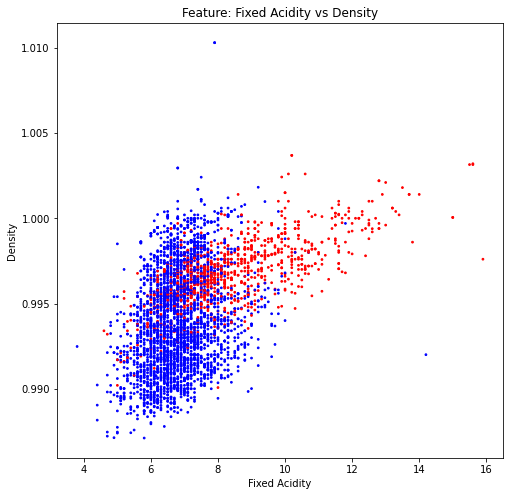

In [723]:
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure(figsize=(8,8))
# (red wine (0) = red, white wine (1) = blue) to detect 0
colors = ['red','blue']               
plt.scatter(X_train['fixed acidity'], X_train['density'], s=3, c = y_train, cmap=matplotlib.colors.ListedColormap(colors))
plt.title("Feature: Fixed Acidity vs Density")
plt.xlabel("Fixed Acidity")
plt.ylabel("Density")

**3.2.2)** Select number of Gaussian components required to fit data from the plot  

- **Based on the plot above, one gaussian component (n_components = 1) is required to fit the white wine data (blue)**

- **AUC (training set) = 0.476 & AUC (validation set) = 0.467 computed below**

**3.2.3)** Fit Gaussian model on the entire training data 


In [724]:
# define parameters of gaussian mixture model - one gaussian component
gm_3a = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state = 1)     

# train the gaussian mixture model  - unsupervised learning (uses no labels)
gm_3a.fit(np.array([X_train['fixed acidity'],X_train['density']]).T) 
# np.array([X_train['total sulfur dioxide'],X_train['chlorides']]).T.shape               

GaussianMixture(random_state=1)



**3.2.4)** Calculate AUC on training data and validation data


In [725]:
# log likelihood each sample belongs to cluster - USING TWO FEATURES
p_train = gm_3a.score_samples(np.array([X_train['fixed acidity'],X_train['density']]).T) 
p_val = gm_3a.score_samples(np.array([X_val['fixed acidity'],X_val['density']]).T)

# AUC - Area Under Curve 
AUC_train = round(roc_auc_score(y_train, -1 * p_train), 3)               
AUC_val = round(roc_auc_score(y_val, -1 * p_val), 3)

print(f'AUC of features "fixed acidity" and "density" from training set: {AUC_train}')
print(f'AUC of features "fixed acidity" and "density" from validation set: {AUC_val}')

AUC of features "fixed acidity" and "density" from training set: 0.476
AUC of features "fixed acidity" and "density" from validation set: 0.467


**3.2.5)** Repeat for two other pair of features
- **Feature Pair 2: citric acid and residual sugar**
- **Feature Pair 3: pH and sulfates**


AUC of features citric acid and residual sugar from training set: 0.63
AUC of features citric acid and residual sugar from validation set: 0.64


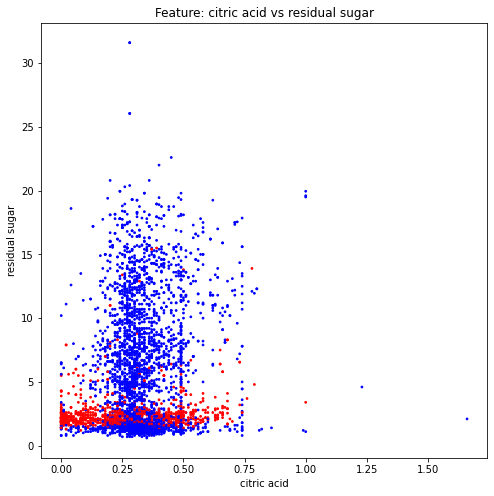

In [726]:
#3.2.5) Feature Pair 2: citric acid and residual sugar

# scatter plot
fig = plt.figure(figsize=(8,8))
# (red wine (0) = red, white wine (1) = blue) to detect 0
colors = ['red','blue']              
plt.scatter(X_train['citric acid'], X_train['residual sugar'], s=3, c = y_train, cmap=matplotlib.colors.ListedColormap(colors))
plt.title("Feature: citric acid vs residual sugar")
plt.xlabel("citric acid")
plt.ylabel("residual sugar")

# fit gaussian model on training set (all samples)
gm_3a = GaussianMixture(n_components = 3,
                    covariance_type = 'full', random_state=1)     

# train the gaussian mixture model  - unsupervised learning (uses no labels)
gm_3a.fit(np.array([X_train['citric acid'],X_train['residual sugar']]).T)     
# np.array([X_train['citric acid'],X_train['residual sugar']]).T.shape           

# compute AUC on both training and validation sets
# log likelihood each sample belongs to cluster - USING TWO FEATURES
p_train = gm_3a.score_samples(np.array([X_train['citric acid'],X_train['residual sugar']]).T) 
p_val = gm_3a.score_samples(np.array([X_val['citric acid'],X_val['residual sugar']]).T)
AUC_train = round(roc_auc_score(y_train, -1 * p_train),3)              
AUC_val = round(roc_auc_score(y_val, -1 * p_val),3)

print(f'AUC of features citric acid and residual sugar from training set: {AUC_train}')
print(f'AUC of features citric acid and residual sugar from validation set: {AUC_val}')

**Note: Based on the plot of citric acid and residual sugar above, three gaussian components (n_components = 3) is required to fit the white wine data (blue) as there seems to be 3 dense clusters**


- **AUC (training set) = 0.630 & AUC (validation set) = 0.640**

AUC of features pH and sulphates from training set: 0.405
AUC of features pH and sulphates from validation set: 0.399


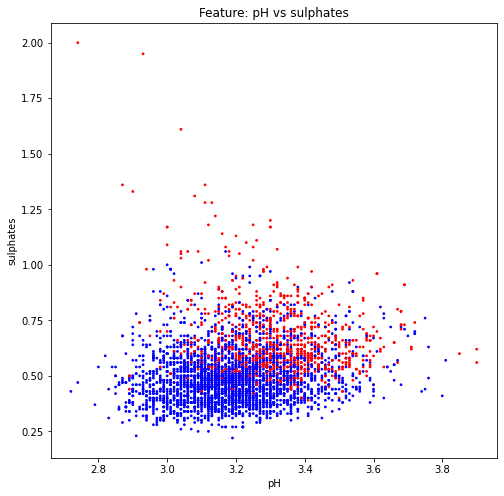

In [727]:
#3.2.5) Feature Pair 3: pH and sulphates

# scatter plot
fig = plt.figure(figsize=(8,8))
# (red wine (0) = red, white wine (1) = blue) to detect 0
colors = ['red','blue']            
plt.scatter(X_train['pH'], X_train['sulphates'], s=3,c = y_train, cmap=matplotlib.colors.ListedColormap(colors))
plt.title("Feature: pH vs sulphates")
plt.xlabel("pH")
plt.ylabel("sulphates")

# fit gaussian model on training set (all samples)
gm_3a = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=1)     

# train the gaussian mixture model  - unsupervised learning (uses no labels)
gm_3a.fit(np.array([X_train['pH'],X_train['sulphates']]).T)            
# np.array([X_train['pH'],X_train['sulphates']]).T.shape 

# compute AUC on both training and validation sets
# log likelihood each sample belongs to cluster - USING TWO FEATURES
p_train = gm_3a.score_samples(np.array([X_train['pH'],X_train['sulphates']]).T) 
p_val = gm_3a.score_samples(np.array([X_val['pH'],X_val['sulphates']]).T)
AUC_train = round(roc_auc_score(y_train, -1 * p_train),3)             
AUC_val = round(roc_auc_score(y_val, -1 * p_val),3)

print(f'AUC of features pH and sulphates from training set: {AUC_train}')
print(f'AUC of features pH and sulphates from validation set: {AUC_val}')

**Note: Based on the plot of pH and sulfates above, one gaussian component (n_components = 1) is required to fit the white wine data (blue)**

- **AUC (training set) = 0.405 & AUC (validation set) = 0.399**



**3.2.6)** Select pair of features with highest AUC on validation data

- **Feature Pair 2: citric acid and residual sugar**

**3.2.7)** Select threshold that maximizes F1 Score on validation data
-  **Threshold to maximize F1 Score on the validation set when using features (citric acid, residual sugar) is -1.869**
- **Results in an F1 Score of 0.62, precision of 0.695 and recall value of 0.559**

In [728]:
#3.2.7) optimal threshold (maximizes F1 score) of validation set for best pair of features

# define parameters of gaussian mixture model - one gaussian component
gm_3a = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=1)     

# train the gaussian mixture model  - unsupervised learning (uses no labels)
gm_3a.fit(np.array([X_train['citric acid'],X_train['residual sugar']]).T)     

# log likelihood each sample belongs to cluster - USING TWO FEATURES          
p_val_cr = gm_3a.score_samples(np.array([X_val['citric acid'],X_val['residual sugar']]).T)      

tr_cr = []
f1_cr = []
pre_cr = []
rec_cr = []
for i in np.arange(1, len(p_val_cr) - 500,15):         # iterate through different thresholds                    
   tr = sorted(p_val_cr)[i]                            # sort the points by probability
   precision = precision_score(y_val, p_val_cr < tr)   # precision = TP / TP + FP
   recall = recall_score(y_val, p_val_cr < tr)         # recall = TP / TP + FN
   f1 = f1_score(y_val,p_val_cr < tr)                  # F1 = 2 * (precision * recall) / (precision + recall)
   
   tr_cr.append(round(tr,3))                           # store the threshold values in a list
   f1_cr.append(round(f1,3))                           # store the F1 score values in a list
   pre_cr.append(round(precision,3))                   # store the precision values in a list
   rec_cr.append(round(recall,3))                      # store the recall values in a list
   print('For k: ',i,'\t  threshold: ','%.3f'% tr ,'  precision: ', '%.3f' % precision,'  recall: ', '%.3f' % recall, '  F1_Score: ','%.3f' % f1) 

idx_cr = f1_cr.index(max(f1_cr))                       # index of maximum F1 score value
f1_cr_val = max(f1_cr)                                 # max F1 Score of validation set
pre_cr_val = pre_cr[idx_cr]                            # corresponding precision score
rec_cr_val = rec_cr[idx_cr]                            # corresponding recall score
tr_cr_val = tr_cr[idx_cr]                              # optimal threshold
print(f'\n max F1 score: {f1_cr_val} with precision: {pre_cr_val}, recall: {rec_cr_val} at threshold: {tr_cr_val} for feature citric acid and residual sugar')  

For k:  1 	  threshold:  -14.222   precision:  1.000   recall:  0.001   F1_Score:  0.002
For k:  16 	  threshold:  -6.122   precision:  0.875   recall:  0.014   F1_Score:  0.028
For k:  31 	  threshold:  -5.280   precision:  0.871   recall:  0.028   F1_Score:  0.054
For k:  46 	  threshold:  -4.822   precision:  0.826   recall:  0.039   F1_Score:  0.075
For k:  61 	  threshold:  -4.541   precision:  0.836   recall:  0.052   F1_Score:  0.099
For k:  76 	  threshold:  -4.127   precision:  0.816   recall:  0.064   F1_Score:  0.118
For k:  91 	  threshold:  -3.979   precision:  0.758   recall:  0.071   F1_Score:  0.130
For k:  106 	  threshold:  -3.924   precision:  0.670   recall:  0.073   F1_Score:  0.132
For k:  121 	  threshold:  -3.814   precision:  0.628   recall:  0.078   F1_Score:  0.139
For k:  136 	  threshold:  -3.660   precision:  0.596   recall:  0.083   F1_Score:  0.146
For k:  151 	  threshold:  -3.555   precision:  0.596   recall:  0.093   F1_Score:  0.160
For k:  166 	  th


**3.2.8)** Scatter plot two separate figures (training vs validation)


In [729]:
# create numpy array of features to plot outliers
X_train_10 = np.array([X_train['citric acid'],X_train['residual sugar']]).T     

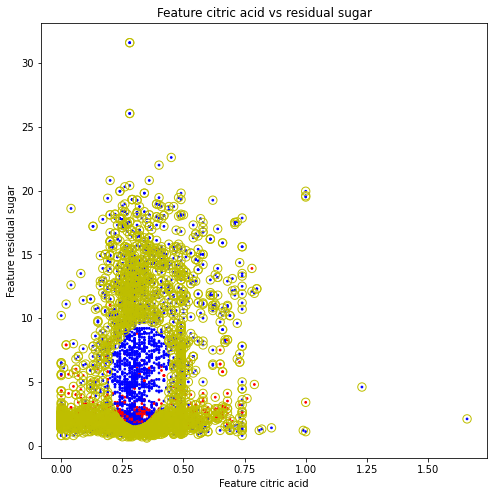

In [730]:
#3.2.8) color the TRAINING set based on class

fig = plt.figure(figsize=(8,8))
# (red wine (0) = red, white wine (1) = blue) to detect 0
colors = ['red','blue']             
plt.scatter(X_train['citric acid'], X_train['residual sugar'], s=3, c = y_train, cmap=matplotlib.colors.ListedColormap(colors))
plt.title("Feature citric acid vs residual sugar")
plt.xlabel("Feature citric acid")
plt.ylabel("Feature residual sugar")

# optimal threshold using features: citric acid and residual sugar
threshold = tr_cr_val             

# log likelihood each sample belongs to cluster - USING TWO FEATURES
p_train_cr = gm_3a.score_samples(np.array([X_train['citric acid'],X_train['residual sugar']]).T)   
# determine the outliers 
outliers = np.nonzero(p_train_cr < threshold)[0]                              
# plot the outliers
plt.scatter(X_train_10[outliers,0],X_train_10[outliers,1],marker="o",facecolor= "none",edgecolor="y",s=70)  
plt.show()

In [731]:
# create numpy array of features to plot outliers
X_val_10 = np.array([X_val['citric acid'],X_val['residual sugar']]).T  

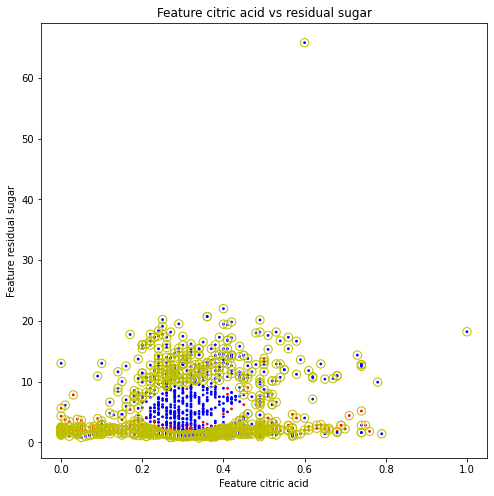

In [732]:
# 3.2.8) color the VALIDATION set based on class
fig = plt.figure(figsize=(8,8))
# (red wine (0) = red, white wine (1) = blue) to detect 0
colors = ['red','blue']            
plt.scatter(X_val['citric acid'], X_val['residual sugar'], s=3, c = y_val, cmap=matplotlib.colors.ListedColormap(colors))
plt.title("Feature citric acid vs residual sugar")
plt.xlabel("Feature citric acid")
plt.ylabel("Feature residual sugar")

# optimal threshold using features: citric acid and residual sugar 
threshold = tr_cr_val              

# determine the outliers
outliers = np.nonzero(p_val_cr < threshold)[0]      
# plot the outliers
plt.scatter(X_val_10[outliers,0],X_val_10[outliers,1],marker="o",facecolor= "none",edgecolor="y",s=70)  
plt.show()

**3.2.9)** Use the 3 best features with best AUC  
- **Free Sulfur Dioxide**
- **Chlorides**
- **Total Sulfur Dioxide**

**3.2.10)** Repeat 3.2.1) to 3.2.4)  


In [733]:
# function for 3D plotting 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plt3d(X_train , y_train, f1, f2, f3, angle):
  X_train_2f = pd.DataFrame(data = X_train,columns=[f1, f2,f3])
  fig = plt.figure()
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_2f[f1][y_train==1], X_train_2f[f2][y_train==1], X_train_2f[f3][y_train==1], c='b', marker='x',label ='White Wine')
  ax.scatter3D(X_train_2f[f1][y_train==0], X_train_2f[f2][y_train==0], X_train_2f[f3][y_train==0], c='r', marker='o',label="Red Wine")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(30, angle)
  plt.show()

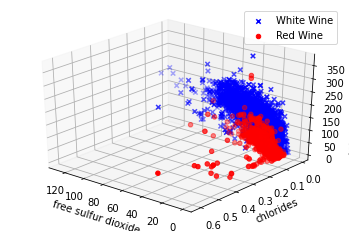

In [734]:
plt3d(X_train, y_train, f1="free sulfur dioxide", f2="chlorides", f3="total sulfur dioxide", angle=130 ) 

**Based on the 3D plot of the three features above, one gaussian component (n_components = 1) is required to fit the white wine data (blue)**

In [735]:
np.array([X_train['free sulfur dioxide'],X_train['chlorides'],X_train['total sulfur dioxide']]).T.shape

(4200, 3)

In [736]:
# fit gaussian model on training set (all samples)
# define parameters of gaussian mixture model - one gaussian component
gm_3b = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=1)      

# train the gaussian mixture model  - unsupervised learning (uses no labels)
gm_3b.fit(np.array([X_train['free sulfur dioxide'],X_train['chlorides'],X_train['total sulfur dioxide']]).T) 

# compute AUC on both training and validation sets
# log likelihood each sample belongs to cluster - USING THREE FEATURES
p_train = gm_3b.score_samples(np.array([X_train['free sulfur dioxide'],X_train['chlorides'],X_train['total sulfur dioxide']]).T) 
p_val = gm_3b.score_samples(np.array([X_val['free sulfur dioxide'],X_val['chlorides'],X_val['total sulfur dioxide']]).T)

# AUC - Area Under Curve 
AUC_train = round(roc_auc_score(y_train, -1 * p_train),3)            
AUC_val = round(roc_auc_score(y_val, -1 * p_val),3)

print(f'AUC of features free sulfur dioxide, chlorides, and total sulfur dioxide from training set: {AUC_train}')
print(f'AUC of features free sulfur dioxide, chlorides, and total sulfur dioxide from validation set: {AUC_val}')

AUC of features free sulfur dioxide, chlorides, and total sulfur dioxide from training set: 0.304
AUC of features free sulfur dioxide, chlorides, and total sulfur dioxide from validation set: 0.297



- **AUC (training set) = 0.304 & AUC (validation set) = 0.297**

**3.2.11)** Select threshold that maximizes F1 Score on validation data

In [737]:
# optimal threshold (maximizes F1 score) of Validation set for 3 best features model
# log likelihood each sample belongs to cluster - USING THREE FEATURES
p_val_3b = gm_3b.score_samples(np.array([X_val['free sulfur dioxide'],X_val['chlorides'],X_val['total sulfur dioxide']]).T) 

tr_3b = []
f1_3b = []
pre_3b = []
rec_3b = []
for i in np.arange(1, len(p_val_3b) - 500,30):       # iterate through different thresholds                    
   tr = sorted(p_val_3b)[i]                            # sort the points by probability
   precision = precision_score(y_val, p_val_3b < tr)   # precision = TP / TP + FP
   recall = recall_score(y_val, p_val_3b < tr)         # recall = TP / TP + FN
   f1 = f1_score(y_val,p_val_3b < tr)                  # F1 = 2 * (precision * recall) / (precision + recall)
   
   tr_3b.append(round(tr,3))                           # store the threshold values in a list
   f1_3b.append(round(f1,3))                           # store the F1 score values in a list
   pre_3b.append(round(precision,3))                   # store the precision values in a list
   rec_3b.append(round(recall,3))                      # store the recall values in a list
   print('For k: ',i,'\t  threshold: ','%.3f'% tr ,'  precision: ', '%.3f' % precision,'  recall: ', '%.3f' % recall, '  F1_Score: ','%.3f' % f1) 

idx_3b = f1_3b.index(max(f1_3b))                       # index of maximum F1 score value
f1_3b_val = max(f1_3b)                                 # max F1 Score of validation set
pre_3b_val = pre_3b[idx_3b]                            # corresponding precision score
rec_3b_val = rec_3b[idx_3b]                            # corresponding recall score
tr_3b_val = tr_3b[idx_3b]                              # optimal threshold
print(f'\n max F1 score: {f1_3b_val} with precision: {pre_3b_val}, recall: {rec_3b_val} at threshold: {tr_3b_val} for feature free sulfur dioxide, chlorides and total sulfur dioxide')  

For k:  1 	  threshold:  -138.174   precision:  1.000   recall:  0.001   F1_Score:  0.002
For k:  31 	  threshold:  -12.937   precision:  0.581   recall:  0.019   F1_Score:  0.036
For k:  61 	  threshold:  -9.618   precision:  0.672   recall:  0.042   F1_Score:  0.079
For k:  91 	  threshold:  -8.715   precision:  0.725   recall:  0.068   F1_Score:  0.124
For k:  121 	  threshold:  -8.437   precision:  0.719   recall:  0.090   F1_Score:  0.159
For k:  151 	  threshold:  -8.150   precision:  0.748   recall:  0.116   F1_Score:  0.201
For k:  181 	  threshold:  -7.924   precision:  0.746   recall:  0.139   F1_Score:  0.234
For k:  211 	  threshold:  -7.815   precision:  0.701   recall:  0.152   F1_Score:  0.250
For k:  241 	  threshold:  -7.709   precision:  0.676   recall:  0.168   F1_Score:  0.269
For k:  271 	  threshold:  -7.635   precision:  0.667   recall:  0.185   F1_Score:  0.290
For k:  301 	  threshold:  -7.556   precision:  0.638   recall:  0.198   F1_Score:  0.302
For k:  331 

**The optimal threshold to maximize the F1 Score on the validation data when using the three best features is -6.613, which results in an F1 Score of 0.568, precision of 0.638 and recall value of 0.512**

### **3.3) Gaussian Model (TWO) - Feature (ONE)**
- one Gaussian model for White Wine, one Gaussian model for Red Wine
   
**3.3.1)** Fit Gaussian model (G1) on a feature of **White Wine**  
*   sklearn.mixture.GaussianMixture
*   n_components = 1

**3.3.2)** Fit Gaussian model (G2) on **same** feature for **Red Wine**  
*   sklearn.mixture.GaussianMixture
*   n_components = 1

**3.3.3)** Score samples on G1 & G2 **validation data** to get S1 & S2  
*   score_samples

**3.3.4)** Find optimal c real number to maximize validation data F1 Score for a model such that if S1 < c X S2, the wine is classified ad Red Wine  
*   ex: c = 1, S1 < S2 the wine belongs to the G2 (Red Wine) distribution

**3.3.5)** Repeat for all features 
*   identify feature and optimal c: best F1 score, precision, recall for **training** and **validation** data




**3.3.1)** Fit Gaussian model (G1) on a feature of **White Wine**    



In [738]:
# feature chosen for G1 and G2 = free sulfur dioxide

# only fit gaussian on WHITE WINE IN THE TRAINING SET
X_train_3 = X_train.copy()                                         # copy the training set
X_train_3['label'] = y_train                                       # add column for red/white wine labels
X_train_3_nf = X_train_3.where(X_train_3['label'] == 1).dropna()   # only keep white wine

# define parameters of gaussian mixture model - single feature
G1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=1)    
# train model using free sulfur dioxide feature - WHITE WINE CLASS ONLY 
G1.fit(np.array(X_train_3_nf['free sulfur dioxide']).reshape(-1,1))                      

GaussianMixture(random_state=1)

**3.3.2)** Fit Gaussian model (G1) on **same** feature for **Red Wine**

In [739]:
X_train_3_f = X_train_3.where(X_train_3['label'] == 0).dropna()    # only keep red wine

G2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=1)     
G2.fit(np.array(X_train_3_f['free sulfur dioxide']).reshape(-1,1))   

GaussianMixture(random_state=1)

**3.3.3)** Score samples on G1 & G2 **validation data** to get S1 & S2  

In [740]:
# log likelihood of belonging to white-wine cluster (larger values)
S1 = G1.score_samples(np.array(X_val['free sulfur dioxide']).reshape(-1,1))    

# log likelihood of belonging to red-wine cluster (larger values)
S2 = G2.score_samples(np.array(X_val['free sulfur dioxide']).reshape(-1,1))    

In [741]:
max_S1 = max(sorted(S1))
max_S2 = max(sorted(S2))
print(f'max log likelihood of VALIDATION data belonging to WHITE WINE CLUSTER(blue): {round(max_S1,3)} vs RED WINE (red):{round(max_S2,3)}')

max log likelihood of VALIDATION data belonging to WHITE WINE CLUSTER(blue): -3.727 vs RED WINE (red):-3.279


**3.3.4)** Find optimal c 

Text(0.5, 1.0, 'Distribution of white wine (blue) vs red wine (red) of feature: free sulfur dioxide')

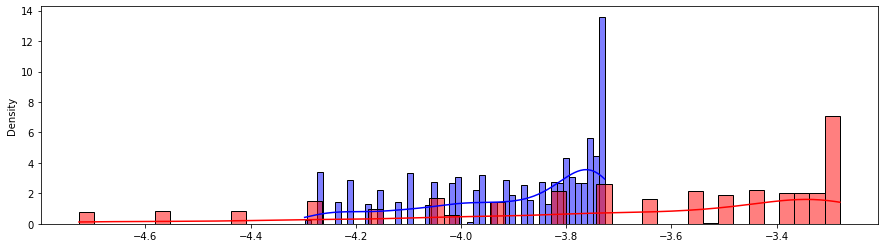

In [742]:
# 3.3.4) Find optimal c 
# Graphical Interpretation of G1/White Wine Distribution(Blue) vs G2/Red Wine Distribution(Red)
import seaborn as sns

plt.figure(figsize=(15,4*1))
sns.histplot(sorted(S1)[500:], stat="density", kde=True, color="blue", bins=50) #log likelihood of VALIDATION data belonging to Non-Fraud Distribution
sns.histplot(sorted(S2)[500:], stat="density", kde=True, color="red", bins=50)  #log likelihood of VALIDATION data belonging to Fraud Distribution
ax.legend(['white wine', 'red wine'],loc='best')
ax.set_xlabel('Feature: free sulfur dioxide')
ax.set_title('Distribution of white wine (blue) vs red wine (red) of feature: ' + 'free sulfur dioxide')

In [743]:
# 3.3.4) Find optimal c 

c_fsd = []
f1_fsd = []
pre_fsd = []
rec_fsd = []
for c in np.arange(0.1,1,0.1):                     # iterate through 100 real numbers
   tr = c*S2                                     # threshold is (real number)*(array of log likelihood of belonging to FRAUD Distribution) 
   precision = precision_score(y_val, S1 < tr)   # precision = TP / TP + FP
   recall = recall_score(y_val, S1 < tr)         # recall = TP / TP + FN
   f1 = f1_score(y_val, S1 < tr)                 # F1 = 2 * (precision * recall) / (precision + recall)

   c_fsd.append(round(c,3))                             # store the real number values in a list
   f1_fsd.append(round(f1,3))                           # store the F1 score values in a list
   pre_fsd.append(round(precision,3))                   # store the precision values in a list
   rec_fsd.append(round(recall,3))                      # store the recall values in a list
   print('For real number: ', '%.1f' % c ,'\t  precision: ', '%.3f' % precision,'  recall: ', '%.3f' % recall, '  F1_Score: ','%.3f' % f1)

idx_fsd = f1_fsd.index(max(f1_fsd))                     # index of maximum F1 score value
f1_fsd_val = max(f1_fsd)                                # max F1 Score of validation set
pre_fsd_val = pre_fsd[idx_fsd]                          # corresponding precision score
rec_fsd_val = rec_fsd[idx_fsd]                          # corresponding recall score
c_fsd_val = c_fsd[idx_fsd]                              # optimal real number
print(f'\n max F1 score: {f1_fsd_val} with precision: {pre_fsd_val}, recall: {rec_fsd_val} at real number: {c_fsd_val} for feature free sulfur dioxide')            


For real number:  0.1 	  precision:  0.752   recall:  1.000   F1_Score:  0.858
For real number:  0.2 	  precision:  0.752   recall:  1.000   F1_Score:  0.858
For real number:  0.3 	  precision:  0.752   recall:  1.000   F1_Score:  0.858
For real number:  0.4 	  precision:  0.741   recall:  0.944   F1_Score:  0.830
For real number:  0.5 	  precision:  0.715   recall:  0.814   F1_Score:  0.761
For real number:  0.6 	  precision:  0.685   recall:  0.701   F1_Score:  0.693
For real number:  0.7 	  precision:  0.653   recall:  0.591   F1_Score:  0.620
For real number:  0.8 	  precision:  0.622   recall:  0.496   F1_Score:  0.552
For real number:  0.9 	  precision:  0.590   recall:  0.427   F1_Score:  0.496

 max F1 score: 0.858 with precision: 0.752, recall: 1.0 at real number: 0.1 for feature free sulfur dioxide


**NOTE: There are precision warning messages for models of some features due to the predictor (S1<c*S2) predicting all non-fraud transactions (all negatives) so there are NO True Positives (TP) or False Positives (FP) so precision = TP/TP + FP = 0 and thus undefined (and thus the warning message)**

**3.3.5)** Repeat for all features - **VALIDATION DATA**

In [744]:
# report feature and real number (c) with best F1 score, precision, recall for training and validation

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

# only fit gaussian on WHITE WINE DATA IN THE TRAINING SET
X_train_3 = X_train.copy()                                         # copy the training set
X_train_3['label'] = y_train                                       # add column for red/white wine labels

X_train_3_nf = X_train_3.where(X_train_3['label'] == 1).dropna()   # only keep white wine data
X_train_3_f = X_train_3.where(X_train_3['label'] == 0).dropna()    # only keep red wine data


# define empty lists to store performance metrics for each feature:
results = pd.DataFrame()                  # empty dataframe to store final results as table
features = list(X_train.columns[1:29])    # list of feature names
precision_list = []                       # list of precision scores
recall_list = []                          # list of recall scores
F1_list = []                              # list of F1 Scores
c_list = []                               # list of optimal number (c)

# iterate through each feature 
for V in features:        

  # fit a Gaussian distribution ( G1  ) on feature using WHITE WINE

  # define parameters of gaussian mixture model - single feature
  G1 = GaussianMixture(n_components = 1,
                      covariance_type = 'full', random_state=1) 
  # train model using feature - WHITE WINE CLASS ONLY
  G1.fit(np.array(X_train_3_nf[V]).reshape(-1,1))     

  # fit another Gaussian distribution ( G2 ) on same feature but for RED WINE
  
  # define parameters of gaussian mixture model - single feature
  G2 = GaussianMixture(n_components = 1,
                      covariance_type = 'full', random_state=1) 
  # train model using feature - RED WINE ONLY
  G2.fit(np.array(X_train_3_f[V]).reshape(-1,1))                

  # compute the score samples (S1 and S2) for both G1 and G2 on the VALIDATION set
  S1 = G1.score_samples(np.array(X_val[V]).reshape(-1,1))       # log likelihood of belonging to white wine cluster (larger values)
  S2 = G2.score_samples(np.array(X_val[V]).reshape(-1,1))       # log likelihood of belonging to red wine cluster (larger values)



  # find optimal c (a real number) to maximize validation set F1 score
  c_v = []
  f1_v = []
  pre_v = []
  rec_v = []
  for c in np.arange(0.1,10,0.1):                   # iterate through 100 real numbers
    tr = c*S2                                       # threshold is (real number)*(array of log likelihood of belonging to RED WINE Distribution) 
    precision = precision_score(y_val, S1 < tr)     # precision = TP / TP + FP
    recall = recall_score(y_val, S1 < tr)           # recall = TP / TP + FN
    f1 = f1_score(y_val, S1 < tr)                   # F1 = 2 * (precision * recall) / (precision + recall)
    c_v.append(round(c,3))                             # store the real number values in a list
    f1_v.append(round(f1,3))                           # store the F1 score values in a list
    pre_v.append(round(precision,3))                   # store the precision values in a list
    rec_v.append(round(recall,3))                      # store the recall values in a list

  idx_v = f1_v.index(max(f1_v))                     # index of maximum F1 score value
  f1_v_val = max(f1_v)                              # max F1 Score of validation set
  pre_v_val = pre_v[idx_v]                          # corresponding precision score
  rec_v_val = rec_v[idx_v]                          # corresponding recall score
  c_v_val = c_v[idx_v]                              # optimal real number
  
  precision_list.append(pre_v_val)
  recall_list.append(rec_v_val)
  F1_list.append(f1_v_val)
  c_list.append(c_v_val)

results['Features'] = features
results['Optimal c'] = c_list
results['F1 Score'] = F1_list
results['Precision'] = precision_list
results['Recall'] = recall_list

In [745]:
results

,Features,Optimal c,F1 Score,Precision,Recall
0,volatile acidity,9.4,0.332,0.484,0.252
1,citric acid,5.4,0.843,0.767,0.935
2,residual sugar,0.1,0.844,0.746,0.971
3,chlorides,6.9,0.861,0.755,1.000
4,free sulfur dioxide,0.1,0.858,0.752,1.000
5,total sulfur dioxide,0.1,0.858,0.752,1.000
6,density,9.8,0.817,0.736,0.918
7,pH,9.3,0.688,0.713,0.664
8,sulphates,7.9,0.612,0.657,0.573
9,alcohol,0.1,0.858,0.752,1.000


In [746]:
# find the feature and c value with maximum F1 Score
results[results['F1 Score'] == results['F1 Score'].max()]   

,Features,Optimal c,F1 Score,Precision,Recall
3,chlorides,6.9,0.861,0.755,1.0


**From the table of resulting performance metrics for each feature above, feature "chlorides" with optimal real number threshold 6.9 has the best F1 Score of 0.861 with corresponding precision of 0.755 and recall of 1 using VALIDATION DATA**

**3.3.5)** Repeat for all features - **TRAINING DATA**

In [747]:
# report feature and real number (c) with best F1 score, precision, recall for training and validation

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

# only fit gaussian on WHITE WINE DATA IN THE TRAINING SET
X_train_3 = X_train.copy()                                         # copy the training set
X_train_3['label'] = y_train                                       # add column for red/white wine labels

X_train_3_nf = X_train_3.where(X_train_3['label'] == 1).dropna()   # only keep white wine data
X_train_3_f = X_train_3.where(X_train_3['label'] == 0).dropna()    # only keep red wine data


# define empty lists to store performance metrics for each feature:
results = pd.DataFrame()                  # empty dataframe to store final results as table
features = list(X_train.columns[1:29])    # list of feature names
precision_list = []                       # list of precision scores
recall_list = []                          # list of recall scores
F1_list = []                              # list of F1 Scores
c_list = []                               # list of optimal number (c)

# iterate through each feature 
for V in features:        

  # fit a Gaussian distribution ( G1  ) on feature using WHITE WINE

  # define parameters of gaussian mixture model - single feature
  G1 = GaussianMixture(n_components = 1,
                      covariance_type = 'full', random_state=1) 
  # train model using feature - WHITE WINE CLASS ONLY
  G1.fit(np.array(X_train_3_nf[V]).reshape(-1,1))     

  # fit another Gaussian distribution ( G2 ) on same feature but for RED WINE
  
  # define parameters of gaussian mixture model - single feature
  G2 = GaussianMixture(n_components = 1,
                      covariance_type = 'full', random_state=1) 
  # train model using feature - RED WINE ONLY
  G2.fit(np.array(X_train_3_f[V]).reshape(-1,1))                

  # compute the score samples (S1 and S2) for both G1 and G2 on the TRAINING set
  S1 = G1.score_samples(np.array(X_train[V]).reshape(-1,1))       # log likelihood of belonging to white wine cluster (larger values)
  S2 = G2.score_samples(np.array(X_train[V]).reshape(-1,1))       # log likelihood of belonging to red wine cluster (larger values)



  # find optimal c (a real number) to maximize training set F1 score
  c_v = []
  f1_v = []
  pre_v = []
  rec_v = []
  for c in np.arange(0.1,10,0.1):                   # iterate through 100 real numbers
    tr = c*S2                                       # threshold is (real number)*(array of log likelihood of belonging to RED WINE Distribution) 
    precision = precision_score(y_train, S1 < tr)     # precision = TP / TP + FP
    recall = recall_score(y_train, S1 < tr)           # recall = TP / TP + FN
    f1 = f1_score(y_train, S1 < tr)                   # F1 = 2 * (precision * recall) / (precision + recall)
    c_v.append(round(c,3))                             # store the real number values in a list
    f1_v.append(round(f1,3))                           # store the F1 score values in a list
    pre_v.append(round(precision,3))                   # store the precision values in a list
    rec_v.append(round(recall,3))                      # store the recall values in a list

  idx_v = f1_v.index(max(f1_v))                     # index of maximum F1 score value
  f1_v_val = max(f1_v)                              # max F1 Score of validation set
  pre_v_val = pre_v[idx_v]                          # corresponding precision score
  rec_v_val = rec_v[idx_v]                          # corresponding recall score
  c_v_val = c_v[idx_v]                              # optimal real number
  
  precision_list.append(pre_v_val)
  recall_list.append(rec_v_val)
  F1_list.append(f1_v_val)
  c_list.append(c_v_val)

results['Features'] = features
results['Optimal c'] = c_list
results['F1 Score'] = F1_list
results['Precision'] = precision_list
results['Recall'] = recall_list

In [748]:
results

,Features,Optimal c,F1 Score,Precision,Recall
0,volatile acidity,6.6,0.319,0.463,0.243
1,citric acid,5.4,0.840,0.769,0.926
2,residual sugar,0.1,0.847,0.752,0.970
3,chlorides,6.4,0.863,0.759,1.000
4,free sulfur dioxide,0.1,0.862,0.757,1.000
5,total sulfur dioxide,0.1,0.862,0.757,1.000
6,density,9.2,0.819,0.741,0.915
7,pH,9.3,0.707,0.719,0.696
8,sulphates,7.2,0.618,0.662,0.581
9,alcohol,0.1,0.862,0.757,1.000


In [749]:
results[results['F1 Score'] == results['F1 Score'].max()]   #find the feature and c value with maximum F1 Score

,Features,Optimal c,F1 Score,Precision,Recall
3,chlorides,6.4,0.863,0.759,1.0


**From the table of resulting performance metrics for each feature above, feature "chlorides" with optimal real number threshold 6.4 has the best F1 Score of 0.863 with corresponding precision of 0.759 and recall of 1 using TRAINING DATA**

**When using two gaussian models, is it difficult to report AUC for the gaussian model that was fitted using the red wine class due to the class imbalance (not enough data compared to gaussian fitted using white wine class), and thus some of the features do not predict the positive class at all, and resulting in a True Positive Rate and False Positive Rate of 0, which is required to graph the ROC and get the Area Under the (ROC) Curve.**

**In other words, the imbalanced classification between red wine and white wine means there are less observations with the red wine class. If the model is fit using the red wine class, the resulting ROC Curve and AUC value is misleading as a small number of red/white wine predictions can significantly affect the ROC-AUC value**

### **3.4) Gaussian Model (MULTI) - Feature (MULTI)**

**3.4.1)** Gaussian Model (TWO) Feature (ONE) 
- two gaussian model (white wine = single component, red wine = multiple components) 
   - it makes sense to have multiple components for the RED WINE CLASS
 as there are less observations and the observations are more spread out -  there are several clusters that could be fit for RED WINE CLASS to increase the precision
- different types of ONE feature
 

**3.4.2)** Gaussian Model (TWO) Feature (THREE) 
- two gaussian model (non-fraud = single component, fraud = multiple components) 
- different COMBINATIONS of THREE features


**3.4.1)** Gaussian Model (TWO) Feature (ONE) 

In [750]:
import random

X_train_4 = X_train.copy()                                         # copy the training set
X_train_4['label'] = y_train                                       # add column for red/white labels
X_train_4_nf = X_train_4.where(X_train_4['label'] == 1).dropna()   # only keep white wine class
X_train_4_f = X_train_4.where(X_train_4['label'] == 0).dropna()    # only keep red wine class

# empty dataframe to store final results as table
results = pd.DataFrame()                
features = list(X_train.columns)  

# VALIDATION SET - Define empty lists to store performance metrics for each feature:
precision_list_val = []                       # list of precision scores
recall_list_val = []                          # list of recall scores
F1_list_val = []                              # list of F1 Scores
c_list_val = []                               # list of optimal number (c)
AUC_val_nf = []                               # list of AUC values for white wine gaussian
AUC_val_f = []                                # list of AUC values for red wine gaussian
# TRAINING SET - Define empty lists to store performance metrics for each feature:
precision_list_train = []                    
recall_list_train = []                      
F1_list_train = []                            
c_list_train = []                        
AUC_train_nf = []                           
AUC_train_f = []                              

multivariate_list = []                    # list for combination of features used
n_components = []                         # list for number of gaussian components used in RED WINE

# iterate through each combination of features 
for V in features:  

  # PARAMETER 1 - n_components:    

  # fit a Gaussian distribution ( G1 ) on feature using WHITE WINE CLASS
  # define parameters - SINGLE GAUSSIAN COMPONENT
  G1 = GaussianMixture(n_components = 1,
                      covariance_type = 'full', random_state=1) 
  # train model using 3 features - WHITE WINE CLASS ONLY
  G1.fit(np.array([X_train_4_nf[V]]).reshape(-1,1)) 
  
  # fit another Gaussian distribution ( G2 ) on same feature but for RED WINE CLASS
  # list of n_components to use for fraudulent gaussian model (S2)
  ran_num = [2, 3, 4, 5, 6]      
  # random value chosen from list to be n_components
  n_com = random.choice(ran_num) 
  # define parameters - MULTIPLE GAUSSIAN COMPONENTS
  G2 = GaussianMixture(n_components = n_com,
                      covariance_type = 'full', random_state=1) 
  # train model using 3 features - RED WINE CLASS ONLY
  G2.fit(np.array([X_train_4_f[V]]).reshape(-1,1)) 

  # compute the score samples (S1 and S2) for both G1 and G2 on the VALIDATION set
  # log likelihood of belonging to WHITE WINE cluster (larger values)
  S1_val = G1.score_samples(np.array([X_val[V]]).reshape(-1,1))
  # log likelihood of belonging to RED WINE cluster (larger values)
  S2_val = G2.score_samples(np.array([X_val[V]]).reshape(-1,1))
   
  # compute the score samples (S1 and S2) for both G1 and G2 on the TRAINING set
  S1_train = G1.score_samples(np.array([X_train[V]]).reshape(-1,1))
  S2_train = G2.score_samples(np.array([X_train[V]]).reshape(-1,1))

  
  # FIND AUC
  # VALIDATION SET - Add AUC values to list
  AUC_val_nf.append(round(roc_auc_score(y_val, -1 * S1_val),3))
  AUC_val_f.append(round(roc_auc_score(y_val, -1 * S2_val),3))

  # TRAINING SET - Add AUC values to list
  AUC_train_nf.append(round(roc_auc_score(y_train, -1 * S1_train),3))
  AUC_train_f.append(round(roc_auc_score(y_train, -1 * S2_train),3))




  #PARAMETER 2 - Threshold:

  # find optimal c (a real number) to maximize validation set F1 score
  #   for a model such that if S1 < c*S2, transaction is classified as red wine
  #   for example, if c = 1 we could say that if S2 is greater than S1, then transaction is red wine (belongs to G2/red wine distribution)

  # VALIDATION SET - Empty lists for performance metrics
  c_v_val = []
  f1_v_val = []
  pre_v_val = []
  rec_v_val = []
  # TRAINING SET - Empty lists for performance metrics
  c_v_train = []
  f1_v_train = []
  pre_v_train = []
  rec_v_train = []

  for c in np.arange(0.1,8,0.3):                   # iterate through 100 real numbers
    # VALIDATION SET - Performance Metrics
    tr_val = c*S2_val                                       # threshold is (real number)*(array of log likelihood of belonging to RED Distribution) 
    precision_val = precision_score(y_val, S1_val < tr_val) # precision = TP / TP + FP
    recall_val = recall_score(y_val, S1_val < tr_val)       # recall = TP / TP + FN
    f1_val = f1_score(y_val, S1_val < tr_val)               # F1 = 2 * (precision * recall) / (precision + recall)
    # TRAINING SET - Performance Metrics
    tr_train = c*S2_train                                           
    precision_train = precision_score(y_train, S1_train < tr_train)   
    recall_train = recall_score(y_train, S1_train < tr_train)         
    f1_train = f1_score(y_train, S1_train < tr_train)                

    # VALIDATION SET - Store Performance Metric of each model
    c_v_val.append(round(c,3))                          # store the real number values in a list
    f1_v_val.append(round(f1_val,3))                    # store the F1 score values in a list
    pre_v_val.append(round(precision_val,3))            # store the precision values in a list 
    rec_v_val.append(round(recall_val,3))               # store the recall values in a list 
    # TRAINING SET - Store Performance Metric of each model
    c_v_train.append(round(c,3))                          
    f1_v_train.append(round(f1_train,3))                  
    pre_v_train.append(round(precision_train,3))          
    rec_v_train.append(round(recall_train,3))              

  #VALIDATION SET - Find THRESHOLD with BEST F1 Score (BEST Performance Metrics)
  idx_v_val = f1_v_val.index(max(f1_v_val))             #index of maximum F1 score value 
  f1_v_val = max(f1_v_val)                              #max F1 Score of validation set 
  pre_v_val = pre_v_val[idx_v_val]                      #corresponding precision score 
  rec_v_val = rec_v_val[idx_v_val]                      #corresponding recall score 
  c_v_val = c_v_val[idx_v_val]                          #optimal real number
  #TRAINING SET - Find THRESHOLD with BEST F1 Score (BEST Performance Metrics)
  idx_v_train = f1_v_train.index(max(f1_v_train))             #index of maximum F1 score value 
  f1_v_train = max(f1_v_train)                              #max F1 Score of validation set 
  pre_v_train = pre_v_train[idx_v_train]                      #corresponding precision score 
  rec_v_train = rec_v_train[idx_v_train]                      #corresponding recall score 
  c_v_train = c_v_train[idx_v_val]                          #optimal real number from VALIDATION data
  
  # VALIDATION SET - add BEST performance metrics to list
  precision_list_val.append(pre_v_val)                    
  recall_list_val.append(rec_v_val)
  F1_list_val.append(f1_v_val)
  c_list_val.append(c_v_val)
  # TRAINING SET - add BEST performance metrics to list
  precision_list_train.append(pre_v_train)                    
  recall_list_train.append(rec_v_train)
  F1_list_train.append(f1_v_train)
  c_list_train.append(c_v_train)

  # add feature combination to list
  multivariate_list.append(V)
  # add number of components used to a list
  n_components.append(n_com)

In [751]:
# create summary of results as a dataframe table:
model = []
for i in range(1, len(X_train.columns)+1):              # iterate through model numbers
  model.append(i)                                       # add model number to list

# label each feature combination as a new model
results['Model #'] = model                         

# feature combination
results['Features'] = features  
# number of components used in Red Wine Gaussian Model
results['n_components'] = n_components              

# VALIDATION SET - create columns
results['Optimal c (VAL)'] = c_list_val                       # optimal threshold c value
results['F1 Score (VAL)'] = F1_list_val                       # best f1 score
results['Precision (VAL)'] = precision_list_val               # corresponding precision value
results['Recall (VAL)'] = recall_list_val                     # corresponding recall value
results['AUC_nf (VAL)'] = AUC_val_nf                          # AUC using white wine gaussian
results['AUC_f (VAL)'] = AUC_val_f                            # AUC using red wine gaussian

# TRAINING SET - create columns
results['Optimal c (TRAIN)'] = c_list_train                 
results['F1 Score (TRAIN)'] = F1_list_train                       
results['Precision (TRAIN)'] = precision_list_train               
results['Recall (TRAIN)'] = recall_list_train                  
results['AUC_nf (TRAIN)'] = AUC_train_nf                   
results['AUC_f (TRAIN)'] = AUC_train_f                            

In [752]:
results

,Model #,Features,n_components,Optimal c (VAL),F1 Score (VAL),Precision (VAL),Recall (VAL),AUC_nf (VAL),AUC_f (VAL),Optimal c (TRAIN),F1 Score (TRAIN),Precision (TRAIN),Recall (TRAIN),AUC_nf (TRAIN),AUC_f (TRAIN)
0,1,fixed acidity,6,0.1,0.858,0.752,1.000,0.254,0.455,0.1,0.862,0.757,1.000,0.274,0.472
1,2,volatile acidity,6,6.4,0.395,0.523,0.318,0.179,0.747,6.4,0.388,0.513,0.311,0.146,0.780
2,3,citric acid,4,7.9,0.831,0.764,0.910,0.248,0.485,7.9,0.824,0.765,0.891,0.258,0.520
3,4,residual sugar,2,0.1,0.858,0.752,1.000,0.510,0.869,0.1,0.862,0.757,1.000,0.558,0.864
4,5,chlorides,5,5.5,0.461,0.553,0.395,0.099,0.877,5.5,0.474,0.565,0.409,0.084,0.912
5,6,free sulfur dioxide,5,0.1,0.858,0.752,1.000,0.277,0.826,0.1,0.862,0.757,1.000,0.277,0.834
6,7,total sulfur dioxide,3,0.1,0.858,0.752,1.000,0.097,0.950,0.1,0.862,0.757,1.000,0.094,0.949
7,8,density,3,7.6,0.811,0.734,0.907,0.446,0.786,7.6,0.814,0.739,0.906,0.423,0.772
8,9,pH,5,3.7,0.653,0.692,0.618,0.406,0.603,3.7,0.675,0.699,0.652,0.401,0.629
9,10,sulphates,6,7.6,0.613,0.661,0.571,0.323,0.672,7.6,0.617,0.664,0.576,0.320,0.677


In [753]:
# best F1 Score for training set
max_train = results['F1 Score (TRAIN)'].max()   
# best F1 Score for validation set
max_val = results['F1 Score (VAL)'].max()   

results[results['F1 Score (VAL)'] == max_val]

,Model #,Features,n_components,Optimal c (VAL),F1 Score (VAL),Precision (VAL),Recall (VAL),AUC_nf (VAL),AUC_f (VAL),Optimal c (TRAIN),F1 Score (TRAIN),Precision (TRAIN),Recall (TRAIN),AUC_nf (TRAIN),AUC_f (TRAIN)
0,1,fixed acidity,6,0.1,0.858,0.752,1.0,0.254,0.455,0.1,0.862,0.757,1.0,0.274,0.472
3,4,residual sugar,2,0.1,0.858,0.752,1.0,0.510,0.869,0.1,0.862,0.757,1.0,0.558,0.864
5,6,free sulfur dioxide,5,0.1,0.858,0.752,1.0,0.277,0.826,0.1,0.862,0.757,1.0,0.277,0.834
6,7,total sulfur dioxide,3,0.1,0.858,0.752,1.0,0.097,0.950,0.1,0.862,0.757,1.0,0.094,0.949
10,11,alcohol,3,0.1,0.858,0.752,1.0,0.544,0.590,0.1,0.862,0.757,1.0,0.571,0.617
11,12,quality,2,0.1,0.858,0.752,1.0,0.491,0.542,0.1,0.862,0.757,1.0,0.508,0.510


**Using one feature, the best model with the highest F1 Score seems to be feature total sulfur dioxide with two gaussians (with 5 components for the red wine gaussian):**
- n_components = 5
- optimal c = 0.1
- F1 Score = 0.858
- Precision = 0.752
- Recall = 1.0
- AUC = 0.950

**3.4.2)** Gaussian Model (TWO) Feature (THREE) 

In [754]:
# two gaussian model (white wine = single component, red wine = multiple components) with COMBINATIONS OF multiple features

import random

X_train_4 = X_train.copy()                                         # copy the training set
X_train_4['label'] = y_train                                       # add column for red/white wine labels
X_train_4_nf = X_train_4.where(X_train_4['label'] == 1).dropna()   # only keep white wine class
X_train_4_f = X_train_4.where(X_train_4['label'] == 0).dropna()    # only keep red wine class

# empty dataframe to store final results as table
results = pd.DataFrame()                  
features = list(X_train.columns)          

# VALIDATION SET - define empty lists to store performance metrics for each feature:
precision_list_val = []                       # list of precision scores
recall_list_val = []                          # list of recall scores
F1_list_val = []                              # list of F1 Scores
c_list_val = []                               # list of optimal number (c)
AUC_val_nf = []                               # list of AUC values for white wine gaussian
AUC_val_f = []                                # list of AUC values for red wine gaussian
# TRAINING SET - define empty lists to store performance metrics for each feature:
precision_list_train = []                  
recall_list_train = []                       
F1_list_train = []                             
c_list_train = []                           
AUC_train_nf = []                             
AUC_train_f = []                               

multivariate_list = []                    # list for combination of features used
n_components = []                         # list for number of gaussian components used in red wine distribution

# iterate through each combination of features 
for i in np.arange(0,len(features)- 2):  

  # PARAMETER 1 - n_components:    

  # fit a Gaussian distribution ( G1 ) on feature using WHITE WINE CLASS
  # define parameters - SINGLE GAUSSIAN COMPONENT
  G1 = GaussianMixture(n_components = 1,
                      covariance_type = 'full', random_state=1) 
  # train model using 3 features - WHITE WINE CLASS ONLY
  G1.fit(np.array([X_train_4_nf[features[i]],X_train_4_nf[features[i+1]],X_train_4_nf[features[i+2]]]).T) 
  
  # fit another Gaussian distribution ( G2 ) on same feature but for RED WINE CLASS
  # list of n_components to use for red wine gaussian model (S2)
  ran_num = [2, 3, 4, 5, 6]      
  # random value chosen from list to be n_components
  n_com = random.choice(ran_num) 
  # define parameters - MULTIPLE GAUSSIAN COMPONENTS
  G2 = GaussianMixture(n_components = n_com,
                      covariance_type = 'full', random_state=1) 
  # train model using 3 features - RED WINE CLASS ONLY
  G2.fit(np.array([X_train_4_f[features[i]],X_train_4_f[features[i+1]],X_train_4_f[features[i+2]]]).T) 

  # compute the score samples (S1 and S2) for both G1 and G2 on the VALIDATION set
  # log likelihood of belonging to white wine cluster (larger values)
  S1_val = G1.score_samples(np.array([X_val[features[i]],X_val[features[i+1]],X_val[features[i+2]]]).T) 
  # log likelihood of belonging to red wine cluster (larger values)
  S2_val = G2.score_samples(np.array([X_val[features[i]],X_val[features[i+1]],X_val[features[i+2]]]).T) 
  # compute the score samples (S1 and S2) for both G1 and G2 on the TRAINING set
  S1_train = G1.score_samples(np.array([X_train[features[i]],X_train[features[i+1]],X_train[features[i+2]]]).T) 
  S2_train = G2.score_samples(np.array([X_train[features[i]],X_train[features[i+1]],X_train[features[i+2]]]).T) 

  
  # FIND AUC
  # VALIDATION SET - add AUC values to list
  AUC_val_nf.append(round(roc_auc_score(y_val, -1 * S1_val),3))
  AUC_val_f.append(round(roc_auc_score(y_val, -1 * S2_val),3))
  # TRAINING SET - add AUC values to list
  AUC_train_nf.append(round(roc_auc_score(y_train, -1 * S1_train),3))
  AUC_train_f.append(round(roc_auc_score(y_train, -1 * S2_train),3))


  #PARAMETER 2 - Threshold:

  # find optimal c (a real number) to maximize validation set F1 score
  #   for a model such that if S1 < c*S2, transaction is classified as red wine
  #   for example, if c = 1 we could say that if S2 is greater than S1, then transaction is red wine (belongs to G2/red wine distribution)

  # VALIDATION SET - empty lists for performance metrics
  c_v_val = []
  f1_v_val = []
  pre_v_val = []
  rec_v_val = []
  # TRAINING SET - empty lists for performance metrics
  c_v_train = []
  f1_v_train = []
  pre_v_train = []
  rec_v_train = []

  for c in np.arange(0.1,10,0.1):                   # iterate through 100 real numbers
    # VALIDATION SET - Performance Metrics
    tr_val = c*S2_val                                       # threshold is (real number)*(array of log likelihood of belonging to RED WINE Distribution) 
    precision_val = precision_score(y_val, S1_val < tr_val) # precision = TP / TP + FP
    recall_val = recall_score(y_val, S1_val < tr_val)       # recall = TP / TP + FN
    f1_val = f1_score(y_val, S1_val < tr_val)               # F1 = 2 * (precision * recall) / (precision + recall)
    # TRAINING SET - Performance Metrics
    tr_train = c*S2_train                                            
    precision_train = precision_score(y_train, S1_train < tr_train)   
    recall_train = recall_score(y_train, S1_train < tr_train)         
    f1_train = f1_score(y_train, S1_train < tr_train)               

    # VALIDATION SET - Store Performance Metric of each model
    c_v_val.append(round(c,3))                          # store the real number values in a list
    f1_v_val.append(round(f1_val,3))                    # store the F1 score values in a list
    pre_v_val.append(round(precision_val,3))            # store the precision values in a list 
    rec_v_val.append(round(recall_val,3))               # store the recall values in a list 
    # TRAINING SET - Store Performance Metric of each model
    c_v_train.append(round(c,3))                        
    f1_v_train.append(round(f1_train,3))              
    pre_v_train.append(round(precision_train,3))          
    rec_v_train.append(round(recall_train,3))           

  # VALIDATION SET - Find THRESHOLD with BEST F1 Score (BEST Performance Metrics)
  idx_v_val = f1_v_val.index(max(f1_v_val))             # index of maximum F1 score value 
  f1_v_val = max(f1_v_val)                              # max F1 Score of validation set 
  pre_v_val = pre_v_val[idx_v_val]                      # corresponding precision score 
  rec_v_val = rec_v_val[idx_v_val]                      # corresponding recall score 
  c_v_val = c_v_val[idx_v_val]                          # optimal real number
  # TRAINING SET - Find THRESHOLD with BEST F1 Score (BEST Performance Metrics)
  idx_v_train = f1_v_train.index(max(f1_v_train))         
  f1_v_train = max(f1_v_train)                       
  pre_v_train = pre_v_train[idx_v_train]                     
  rec_v_train = rec_v_train[idx_v_train]          
  c_v_train = c_v_train[idx_v_val]                    
  
  # VALIDATION SET - Add BEST performance metrics to list
  precision_list_val.append(pre_v_val)                    
  recall_list_val.append(rec_v_val)
  F1_list_val.append(f1_v_val)
  c_list_val.append(c_v_val)
  # TRAINING SET - Add BEST performance metrics to list
  precision_list_train.append(pre_v_train)                    
  recall_list_train.append(rec_v_train)
  F1_list_train.append(f1_v_train)
  c_list_train.append(c_v_train)

  # add feature combination to list
  multivariate_list.append(features[i] + ' ' + features[i+1] +' ' + features[i+2])
  # add number of components used to a list
  n_components.append(n_com)

In [755]:
# create summary of results as a dataframe table:
model = []
for i in range(1,len(features) - 1):              # iterate through model numbers
  model.append(i)                                 # add model number to list

# label each feature combination as a new model
results['Model #'] = model                        

# feature combination
results['Feature Combination'] = multivariate_list 
# number of components used in RED WINE Gaussian Model
results['n_components'] = n_components              

#VALIDATION SET - Create columns
results['Optimal c (VAL)'] = c_list_val                       # optimal threshold c value
results['F1 Score (VAL)'] = F1_list_val                       # best f1 score
results['Precision (VAL)'] = precision_list_val               # corresponding precision value
results['Recall (VAL)'] = recall_list_val                     # corresponding recall value
results['AUC_nf (VAL)'] = AUC_val_nf                          # AUC using non-fraudulent gaussian
results['AUC_f (VAL)'] = AUC_val_f                            # AUC using fraudulent gaussian

#TRAINING SET - Create columns
results['Optimal c (TRAIN)'] = c_list_train              
results['F1 Score (TRAIN)'] = F1_list_train                   
results['Precision (TRAIN)'] = precision_list_train             
results['Recall (TRAIN)'] = recall_list_train
results['AUC_nf (TRAIN)'] = AUC_train_nf                    
results['AUC_f (TRAIN)'] = AUC_train_f                   

In [756]:
results

,Model #,Feature Combination,n_components,Optimal c (VAL),F1 Score (VAL),Precision (VAL),Recall (VAL),AUC_nf (VAL),AUC_f (VAL),Optimal c (TRAIN),F1 Score (TRAIN),Precision (TRAIN),Recall (TRAIN),AUC_nf (TRAIN),AUC_f (TRAIN)
0,1,fixed acidity volatile acidity citric acid,6,0.1,0.235,0.375,0.171,0.090,0.772,0.1,0.245,0.388,0.179,0.078,0.803
1,2,volatile acidity citric acid residual sugar,3,0.1,0.749,0.707,0.796,0.154,0.884,0.1,0.767,0.720,0.820,0.144,0.894
2,3,citric acid residual sugar chlorides,3,0.1,0.201,0.338,0.143,0.120,0.901,0.1,0.209,0.349,0.149,0.128,0.925
3,4,residual sugar chlorides free sulfur dioxide,4,0.1,0.858,0.752,1.000,0.133,0.938,0.1,0.862,0.757,1.000,0.146,0.952
4,5,chlorides free sulfur dioxide total sulfur dio...,6,0.1,0.858,0.752,1.000,0.053,0.957,0.1,0.862,0.757,1.000,0.056,0.974
5,6,free sulfur dioxide total sulfur dioxide density,6,0.1,0.858,0.752,1.000,0.063,0.973,0.1,0.862,0.757,1.000,0.060,0.977
6,7,total sulfur dioxide density pH,5,0.1,0.341,0.461,0.271,0.052,0.963,0.1,0.341,0.465,0.269,0.048,0.969
7,8,density pH sulphates,5,9.5,0.764,0.715,0.819,0.282,0.822,9.5,0.779,0.725,0.842,0.291,0.835
8,9,pH sulphates alcohol,4,0.1,0.529,0.655,0.444,0.331,0.706,0.1,0.513,0.648,0.425,0.340,0.737
9,10,sulphates alcohol quality,5,0.1,0.858,0.752,1.000,0.383,0.677,0.1,0.862,0.757,1.000,0.387,0.698


In [757]:
# best F1 Score for training set
max_train = results['F1 Score (TRAIN)'].max()   
# best F1 Score for validation set 
max_val = results['F1 Score (VAL)'].max()   
   
results[results['F1 Score (VAL)'] == max_val]

,Model #,Feature Combination,n_components,Optimal c (VAL),F1 Score (VAL),Precision (VAL),Recall (VAL),AUC_nf (VAL),AUC_f (VAL),Optimal c (TRAIN),F1 Score (TRAIN),Precision (TRAIN),Recall (TRAIN),AUC_nf (TRAIN),AUC_f (TRAIN)
3,4,residual sugar chlorides free sulfur dioxide,4,0.1,0.858,0.752,1.0,0.133,0.938,0.1,0.862,0.757,1.0,0.146,0.952
4,5,chlorides free sulfur dioxide total sulfur dio...,6,0.1,0.858,0.752,1.0,0.053,0.957,0.1,0.862,0.757,1.0,0.056,0.974
5,6,free sulfur dioxide total sulfur dioxide density,6,0.1,0.858,0.752,1.0,0.063,0.973,0.1,0.862,0.757,1.0,0.060,0.977
9,10,sulphates alcohol quality,5,0.1,0.858,0.752,1.0,0.383,0.677,0.1,0.862,0.757,1.0,0.387,0.698


**Using THREE features, the best model with the highest F1 Score seems to be features (free sulfur dioxide, total sulfur dioxide, density) with two gaussians (with 6 components for the red wine gaussian)**

- n_components = 6
- optimal c = 0.1
- F1 Score = 0.858
- Precision = 0.752
- Recall = 1.0
- AUC = 0.973

### **3.5) Gaussian Mixture Model** 
(using **test data set**)


**Best Overall Model**:
- **3 Features**
   - free sulfur dioxide
   - total sulfur dioxide
   - density
- **2 Gaussian Models**
   - white wine distribution
   - red wine distribution
      - **6 Components** 

In [758]:
# convert the target class labels to 1 and 0
y_test = y_test.map({'white': 1, 'red': 0}).astype(int)

# clean data
X_train_5 = X_train.copy()                                         # copy the training set
X_train_5['label'] = y_train                                       # add column for RED/WHITE labels
X_train_5_nf = X_train_5.where(X_train_5['label'] == 1).dropna()   # only keep WHITE WINE CLASS
X_train_5_f = X_train_5.where(X_train_5['label'] == 0).dropna()    # only keep RED WINE CLASS

# fit a Gaussian distribution ( G1 ) on the features of WHITE WINE CLASS
# define parameters of gaussian mixture model - single feature
G1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=1)    
# train model using free sulfur dioxide feature - WHITE WINE CLASS ONLY
G1.fit(np.array([X_train_5_nf['free sulfur dioxide'],X_train_5_nf['total sulfur dioxide'],X_train_5_nf['density']]).T)                

# fit another Gaussian distribution ( G2 ) on same features but for RED WINE CLASS
# define parameters of gaussian mixture model - single feature
G2 = GaussianMixture(n_components = 6,
                    covariance_type = 'full', random_state=1)  
# train model using free sulfur dioxide feature - RED WINE CLASS ONLY   
G2.fit(np.array([X_train_5_f['free sulfur dioxide'],X_train_5_f['total sulfur dioxide'],X_train_5_f['density']]).T)              

# compute the score samples (S1 and S2) for both G1 and G2 on the TEST set
# log likelihood of belonging to white wine cluster (larger values)
S1 = G1.score_samples(np.array([X_test['free sulfur dioxide'],X_test['total sulfur dioxide'],X_test['density']]).T) 
# log likelihood of belonging to red wine cluster (larger values)    
S2 = G2.score_samples(np.array([X_test['free sulfur dioxide'],X_test['total sulfur dioxide'],X_test['density']]).T)      

# find optimal c (a real number) to maximize validation set F1 score
#   for a model such that if S1 < c*S2, transaction is classified as red wine
#   for example, if c = 1 we could say that if S2 is greater than S1, then transaction is red wine (belongs to G2/red wine distribution)

c_fsd = []
f1_fsd = []
pre_fsd = []
rec_fsd = []
for c in np.arange(0.1,10,0.1):                    # iterate through 100 real numbers
   tr = c*S2                                       # threshold is (real number)*(array of log likelihood of belonging to RED WINE Distribution) 
   precision = precision_score(y_test, S1 < tr)    # precision = TP / TP + FP
   recall = recall_score(y_test, S1 < tr)          # recall = TP / TP + FN
   f1 = f1_score(y_test, S1 < tr)                  # F1 = 2 * (precision * recall) / (precision + recall)

   c_fsd.append(round(c,3))                             # store the real number values in a list
   f1_fsd.append(round(f1,3))                           # store the F1 score values in a list
   pre_fsd.append(round(precision,3))                   # store the precision values in a list
   rec_fsd.append(round(recall,3))                      # store the recall values in a list

idx_fsd = f1_fsd.index(max(f1_fsd))                     # index of maximum F1 score value
f1_fsd_val = max(f1_fsd)                                # max F1 Score of validation set
pre_fsd_val = pre_fsd[idx_fsd]                          # corresponding precision score
rec_fsd_val = rec_fsd[idx_fsd]                          # corresponding recall score
c_fsd_val = c_fsd[idx_fsd]                              # optimal real number
print(f'\n max F1 score: {f1_fsd_val} with precision: {pre_fsd_val}, recall: {rec_fsd_val} at real number: {c_fsd_val} using the best model')            



 max F1 score: 0.85 with precision: 0.739, recall: 1.0 at real number: 0.1 using the best model


**Using the overall best model, the resulting performance metrics on the test set are:**
- F1 Score = 0.85
- Precision = 0.739
- Recall = 1.0 

***poor dataset, precision and recall tradeoff not accurate***.  
***step by step process is the same***